In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection 
# import plotly.graph_objects as go
from matplotlib.patches import Circle
from scipy.integrate import solve_ivp
import nolds as nd
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.stats import pearsonr
import matplotlib.gridspec as gridspec
import pandas as pd

import lyapynov
from lyapynov import ContinuousDS, DiscreteDS
from lyapynov import mLCE, LCE, CLV, ADJ


from matplotlib import rc

font = {'family' : 'serif',
    'serif': 'sans',
    'weight' : 'bold',
    'size'   : 10}

plt.rc('font', **font)
plt.rc('text', usetex=True)

## Fig. 1

In [4]:
sz=18

#parameters
A = 0.0041
alpha=5.276
gamma = 0.315
I= 0.015

#2D dML system
def system(t, vars):
    x, y= vars
    dxdt = x**2 * (1 - x) - y + I
    dydt = A * np.exp(alpha * x) - gamma * y
   
    return [dxdt, dydt]

#Initial conditions
x_0 = -0.25
y_0 = 0.1
initial_conditions = [x_0, y_0]


#Time span
t_span = (0, 8000)  # from t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 20000)  # points at which to store the computed solutions

# Solve the system of differential equations
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract solutions
x_sol = solution.y[0]
y_sol = solution.y[1]

<IPython.core.display.Javascript object>


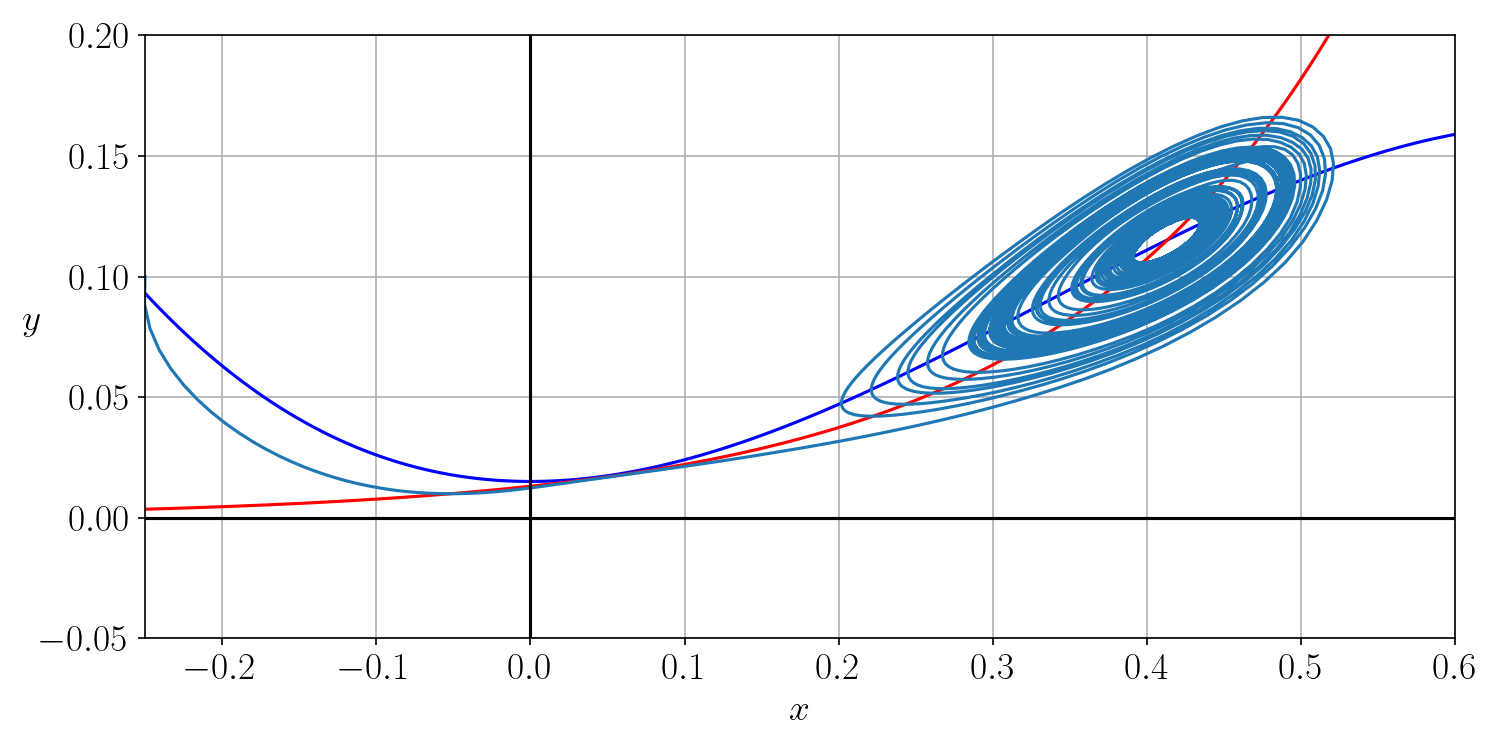

In [7]:
%matplotlib notebook
plt.figure(figsize=(10, 5))

x_vals = np.linspace(-.25, .6, 200)
y_vals = np.linspace(-.05, .2, 200)

X, Y = np.meshgrid(x_vals, y_vals)

#Nullclines for dML
nullcline_x = X**2*(1-X) - Y + I
nullcline_y = A*np.exp(alpha*X) - gamma*Y

plt.contour(X, Y, nullcline_x, levels=[0], colors='b')
plt.contour(X, Y, nullcline_y, levels=[0], colors='r')

plt.plot(x_sol, y_sol, '-', rasterized=True)
plt.xlabel('$x$', size=sz)
plt.ylabel('$y$', rotation=False, size=sz)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)
plt.grid()

plt.xlim(-.25, .6)
plt.ylim(-.05, .2)
plt.axhline(y=0, c='k')
plt.axvline(x=0, c='k')

plt.tight_layout()



<IPython.core.display.Javascript object>


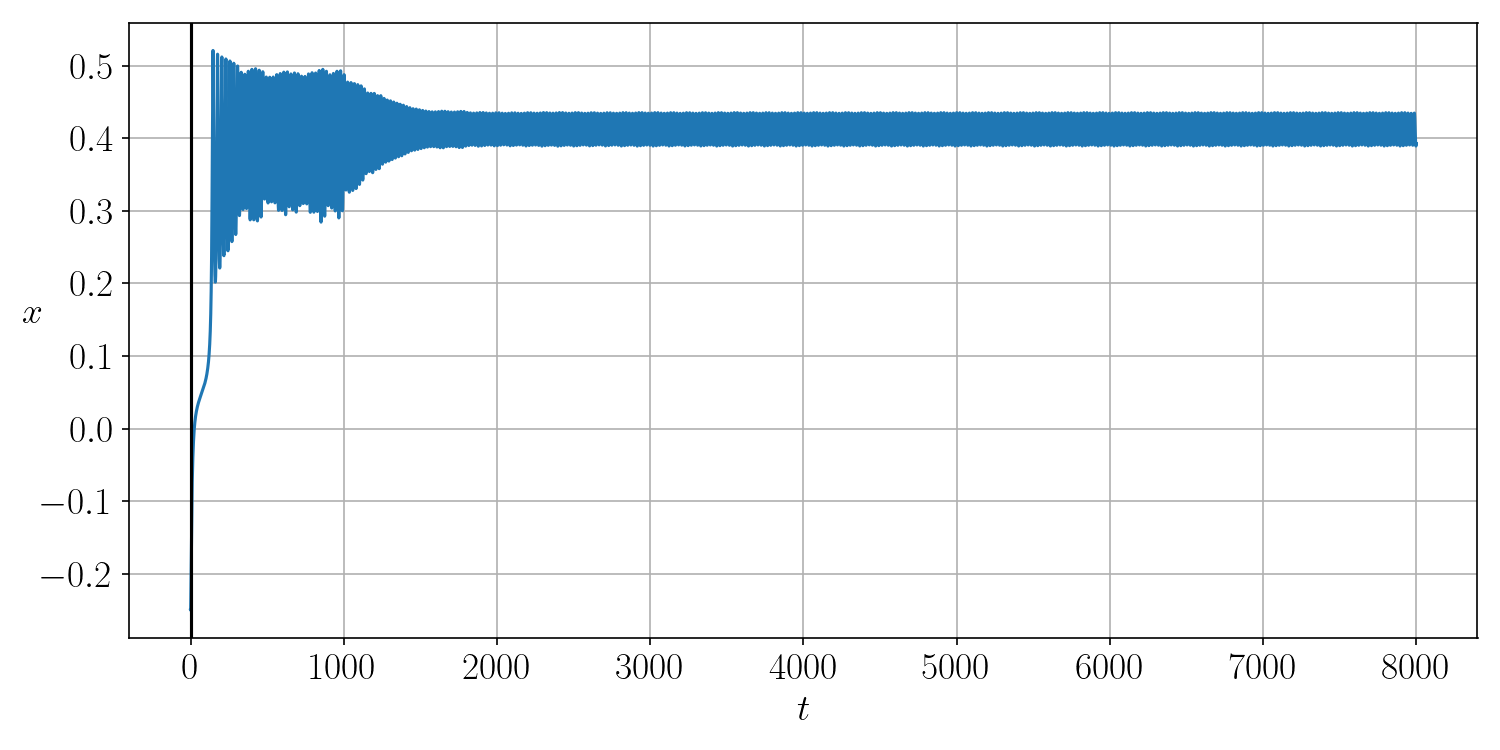

In [9]:
%matplotlib notebook
plt.figure(figsize=(10, 5))
plt.plot(solution.t, x_sol)
plt.xlabel('$t$', size=sz)
plt.ylabel('$x$', rotation=False, size=sz)
plt.yticks(size=sz)
plt.xticks(size=sz)
plt.grid()
plt.axvline(x=0, color='black')
plt.tight_layout()


## Fig. 2

<IPython.core.display.Javascript object>


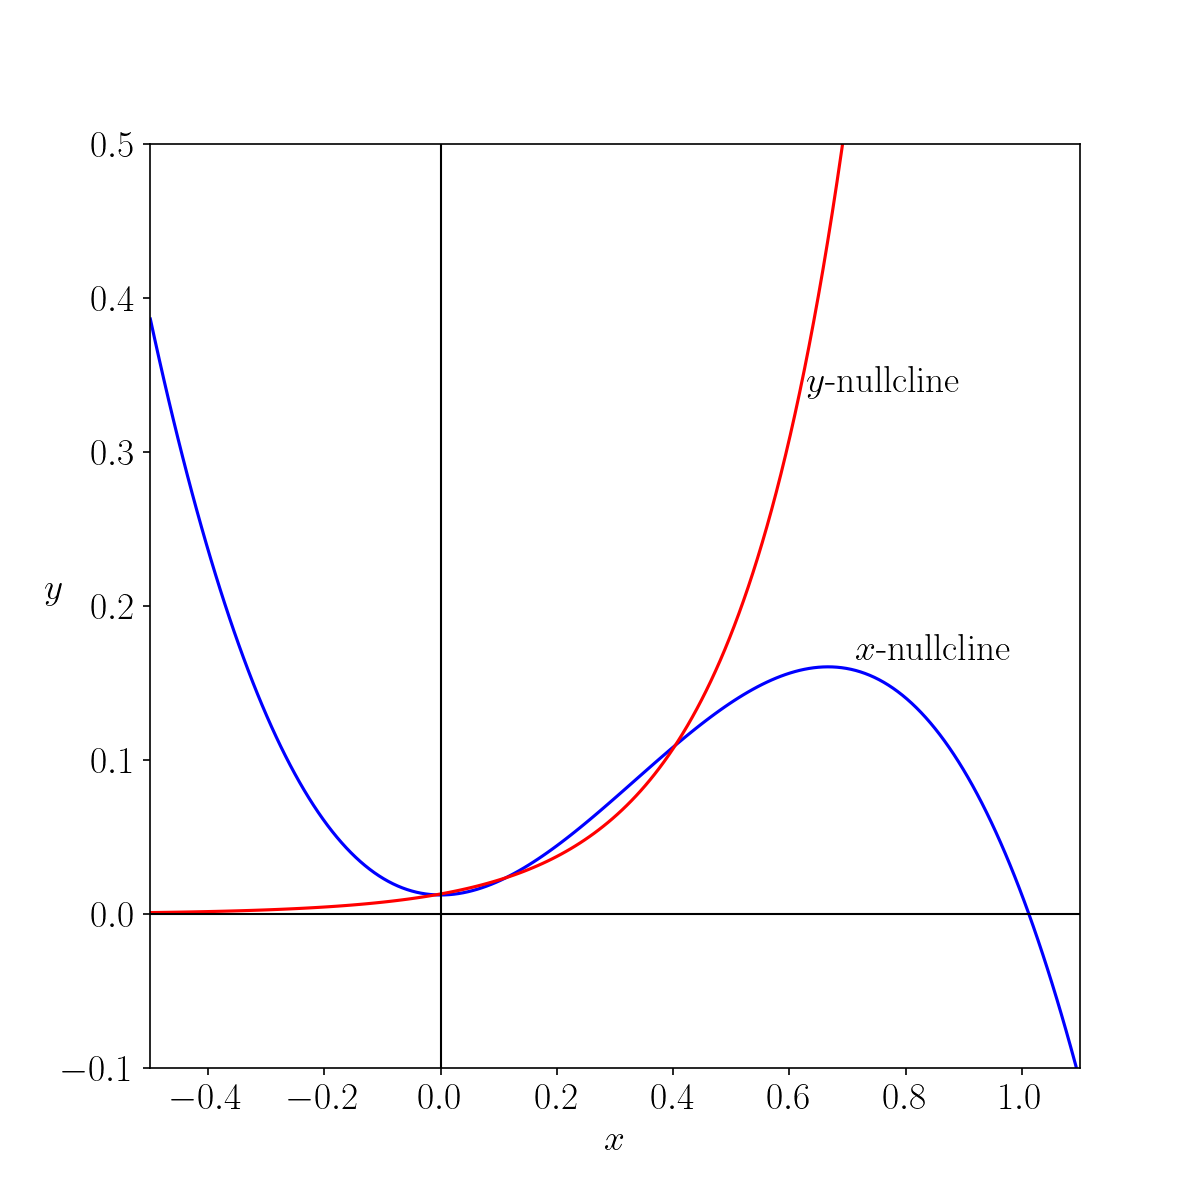

Text(0.631, 0.339, '$y$-nullcline')

In [3]:
%matplotlib notebook
sz=18

#Parameters
A = 0.0041
alpha = 5.276
gamma = 0.315
I = 0.012347

plt.figure(figsize=(8, 8))


#dML
y_vals = np.linspace(-.1, .5, 200)
x_vals = np.linspace(-.5, 1, 200)

#fhn
y_vals = np.linspace(-.1, .5, 200)
x_vals = np.linspace(-.5, 1.1, 200)

X, Y = np.meshgrid(x_vals, y_vals)

#Nullclines
nullcline_x = X**2*(1-X) - Y + I 
nullcline_y = A*np.exp(alpha*X) - gamma*Y  # dML
# nullcline_y = A*X - gamma*Y  # fhn


#Nullclines plots
plt.contour(X, Y, nullcline_x, levels=[0], colors='b')
plt.contour(X, Y, nullcline_y, levels=[0], colors='r')

plt.xlabel('$x$', size=sz)
plt.ylabel('$y$', rotation=False,size=sz)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)

#dML
plt.text(0.714, 0.165, "$x$-nullcline", size=sz)
plt.text(0.631, 0.339, "$y$-nullcline", size=sz)

# #fhn
# plt.text(0.714, 0.165, "$x$-nullcline", size=sz)
# plt.text(-0.44, -0.03, "$y$-nullcline", size=sz)


## Fig. 3

In [4]:
A = 0.0041
alpha=5.276
gamma = 0.315
epsilon = 0.001

def system(t, vars):
    x, y, I= vars

    dxdt = x**2 * (1 - x) - y + I
    dydt = A * np.exp(alpha * x) - gamma * y
    dIdt = epsilon*(1/60*(1+np.tanh((0.05-x)/0.001)) - I)

    return [dxdt, dydt, dIdt]


x_0 = np.random.uniform(low=-1, high=1)
y_0 = 0.1
I_0 = 0.012347

initial_conditions = [x_0, y_0, I_0]

t_span = (0, 8000)  # from t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 20000)  # points at which to store the computed solutions

solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

x_sol = solution.y[0]
y_sol = solution.y[1]
I_sol = solution.y[2]

<IPython.core.display.Javascript object>


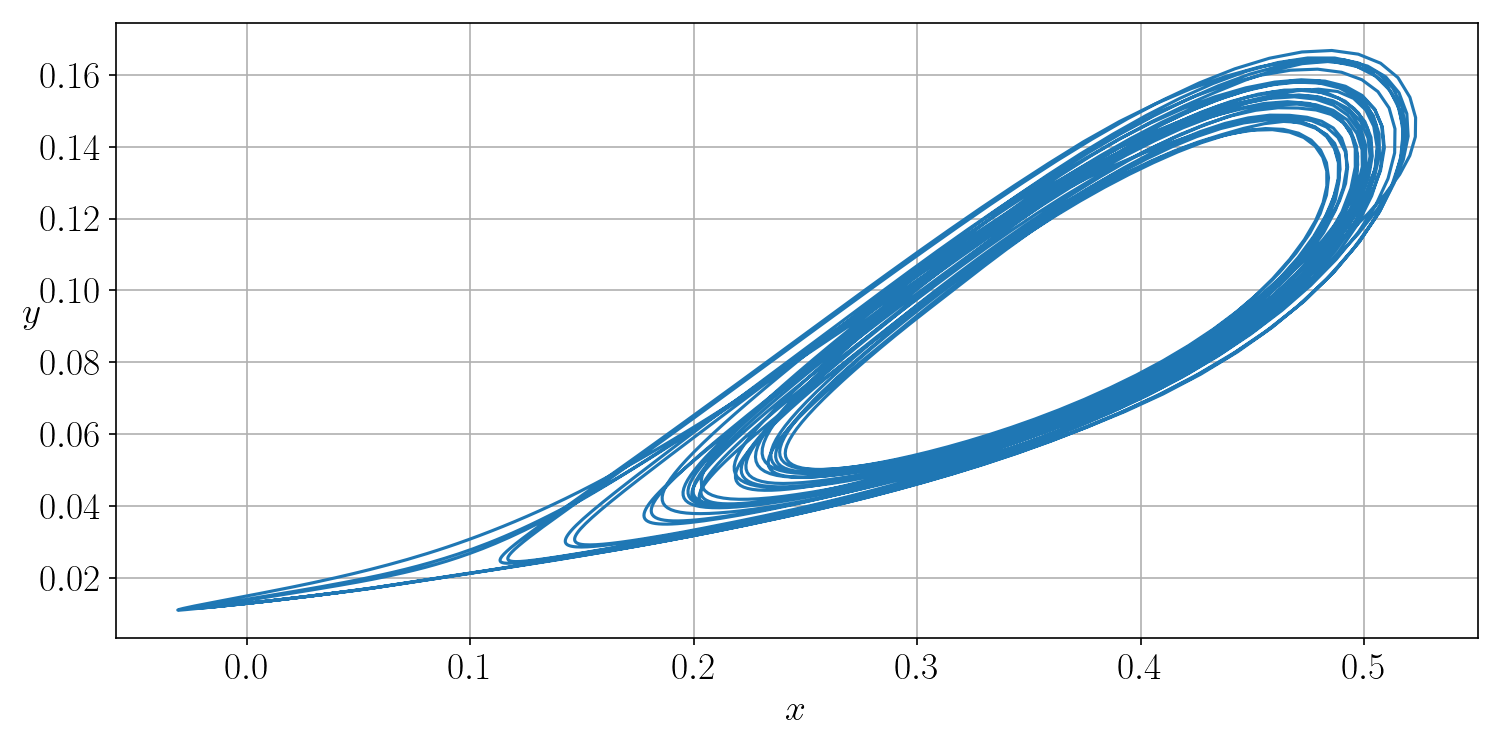

In [5]:
%matplotlib notebook
plt.figure(figsize=(10, 5))

plt.plot(x_sol[15000:], y_sol[15000:], '-', rasterized=True)
plt.xlabel('$x$', size=sz)
plt.ylabel('$y$', rotation=False, size=sz)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)
plt.grid()

plt.tight_layout()

<IPython.core.display.Javascript object>


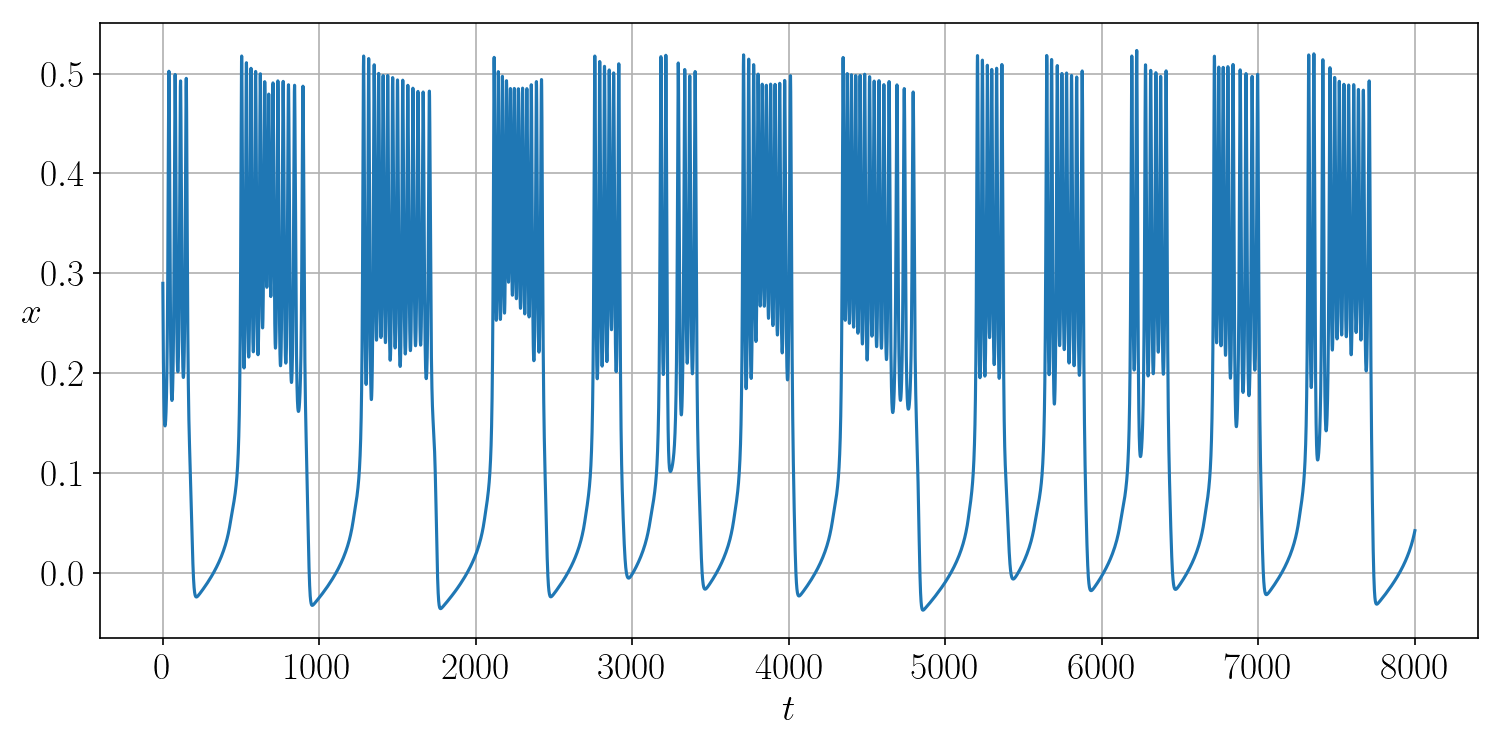

In [6]:
%matplotlib notebook
plt.figure(figsize=(10, 5))
plt.plot(solution.t, x_sol)
plt.xlabel('$t$', size=sz)
plt.ylabel('$x$', rotation=False, size=sz)
plt.yticks(size=sz)
plt.xticks(size=sz)
plt.grid()
plt.tight_layout()

## Fig. 7

In [13]:
#One function that computes all measures for the two-coupled dML system
def analysis(theta, A, alpha, gamma, epsilon, x1_0, y1_0, I1_0, x2_0, y2_0, I2_0):

    x0 = np.array([x1_0, y1_0, I1_0, x2_0, y2_0, I2_0]) #initial conditions
    t0 = 0. #initial time
    dt = 1e-2 #time step

    def f(x,t):
        res = np.zeros_like(x)

        x1, y1, I1, x2, y2, I2 = x[0], x[1], x[2], x[3], x[4], x[5]

        res[0] = x1**2 * (1 - x1) - y1 + I1+ theta * (x2 - x1)
        res[1] = A * np.exp(alpha * x1) - gamma * y1
        res[2] = epsilon*(1/60*(1+np.tanh((0.05-x1)/0.001)) - I1)
        res[3] = x2**2 * (1 - x2) - y2 + I2 + theta * (x1 - x2)
        res[4] = A * np.exp(alpha * x2) - gamma * y2
        res[5] = epsilon*(1/60*(1+np.tanh((0.05-x2)/0.001)) - I2)
        return res

    def jac(x,t):
        #Evaluates the Jacobian matrix of the two-coupled system
        res = np.zeros((x.shape[0], x.shape[0]))
        x1, y1, I1, x2, y2, I2 = x[0], x[1], x[2], x[3], x[4], x[5]

        def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)

        res[0, 0] = x1*(2-3*x1) - theta
        res[0, 1] = -1
        res[0, 2] = 1
        res[0, 3] = theta
        res[0, 4] = 0
        res[0, 5] = 0

        res[1, 0] = A*alpha*np.exp(alpha*x1)
        res[1, 1] = -gamma
        res[1, 2] = 0
        res[1, 3] = 0
        res[1, 4] = 0
        res[1, 5] = 0

        res[2, 0] = L(x1)
        res[2, 1] = 0
        res[2, 2] = -epsilon
        res[2, 3] = 0
        res[2, 4] = 0
        res[2, 5] = 0

        res[3, 0] = theta
        res[3, 1] = 0
        res[3, 2] = 0
        res[3, 3] = x2*(2-3*x2)-theta
        res[3, 4] = -1
        res[3, 5] = 1

        res[4, 0] = 0
        res[4, 1] = 0
        res[4, 2] = 0
        res[4, 3] = A*alpha*np.exp(alpha*x2)
        res[4, 4] = -gamma
        res[4, 5] = 0

        res[5, 0] = 0
        res[5, 1] = 0
        res[5, 2] = 0
        res[5, 3] = L(x2)
        res[5, 4] = 0
        res[5, 5] = -epsilon


        return res

    System = ContinuousDS(x0, t0, f, jac, dt)
    
    EXP, history1 = LCE(System, 6, 0, 5*10**4, True) # computes the Lyapunov exponents
    
    history1 = np.array(history1)
    history2 = np.mean(history1[5000:], axis=0)
    print("mean of history2 = "+str(history2))
    
    LL = np.sort(history2)[::-1]
    
    #preprocessing of the Lyapunov exponents
    for i in range(len(LL)):
        if LL[i]>-0.01 and LL[i]<0.01:
            LL[i] = 0
    
    CC = np.sum(LL>0)
    print(" ")
    print("LL =", np.round(LL, 4)) #Lyapunov exponents
    print("phi = "+str(np.round(np.sum(LL), 4))) #phi for dissipativity
    print("C="+str(CC)) #counts of positive lyapunov exponents

    if sum(np.sign(LL))==-6.:
        D = 0 
    else:
        for i in range(len(LL)):
            if sum(LL[:i])>=0 and sum(LL[:i+1])<0:
#             print(sum(LL[:i]), sum(LL[:i+1]))
                ind = i

        D = ind + sum(LL[:ind])/np.abs(LL[ind]) #Lyapunov dimension
        
    def system(t, vars):
        x1, y1, I1, x2, y2, I2= vars
        dx1dt = x1**2 * (1 - x1) - y1 + I1+ theta * (x2 - x1)
        dy1dt = A * np.exp(alpha * x1) - gamma * y1
        dI1dt = epsilon*(1/60*(1+np.tanh((0.05-x1)/0.001)) - I1)
        dx2dt = x2**2 * (1 - x2) - y2 + I2 + theta * (x1 - x2)
        dy2dt = A * np.exp(alpha * x2) - gamma * y2
        dI2dt = epsilon*(1/60*(1+np.tanh((0.05-x2)/0.001)) - I2)

        return [dx1dt, dy1dt, dI1dt, dx2dt, dy2dt, dI2dt]

    initial_conditions = [x1_0, y1_0, I1_0, x2_0, y2_0, I2_0]

    print(x1_0, x2_0)

    # Time span for the solution
    t_span = (0, 8000)  # from t=0 to t=10
    t_eval = np.linspace(t_span[0], t_span[1], 20000)

    # Solve the system of differential equations
    solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

    # Extract solutions
    x1_sol = solution.y[0]
    y1_sol = solution.y[1]
    I1_sol = solution.y[2]

    x2_sol = solution.y[3]
    y2_sol = solution.y[4]
    I2_sol = solution.y[5]
    
    time = solution.t
    
    phi_x1 = np.array(x1_sol[5000:])
    phi_x2 = np.array(x2_sol[5000:])
    
    x1_tilde = phi_x1 - np.mean(phi_x1)
    x2_tilde = phi_x2 - np.mean(phi_x2)
    
    # For computing the cross-correlation coefficient
    Numerator = np.mean(x1_tilde*x2_tilde)
    Denominator = np.sqrt(np.mean(x1_tilde**2)*np.mean(x2_tilde**2))
    
    # The next bit is for computing the 0-1 test
    def pq(phi, c):
        imax = len(phi)
        p = np.zeros(imax)
        q = np.zeros(imax)
        p[0] = phi[0] * np.cos(c)
        q[0] = phi[0] * np.sin(c)
        for i in range(1, imax):
            p[i] = p[i-1] + phi[i-1]*np.cos(c * (i-1))
            q[i] = q[i-1] + phi[i-1]*np.sin(c * (i-1))
        return p,q
    
    
    def Mn_c(phi, c, ncut):
        p, q = pq(phi, c)
        N = len(phi) - ncut
        Mn = np.zeros(ncut)
        for n in range(0, ncut):
            Mn[n] = np.mean([(p[j+n] - p[j])**2 + (q[j+n] - q[j])**2 for j in range(0, N)])
        return Mn

    def Vosc_c(phi, c, ncut):
        E_phi = np.mean(phi)
        return [E_phi**2 * (1 - np.cos(n*c))/(1 - np.cos(c)) for n in range(0, ncut)]

    def Dn_c(phi, c, ncut):
        return Mn_c(phi, c, ncut) - Vosc_c(phi, c, ncut)

    def correlation_method(phi, ncut):
        eps = np.arange(1, ncut + 1)
        c_range = np.arange(0.01, 2*np.pi, 0.01)
        K_c = [pearsonr(eps, Dn_c(phi, c, ncut))[0] for c in c_range]
        valid_indices = np.where(~np.isnan(K_c))[0]
        return np.median(np.array(K_c)[valid_indices])

    def Dn_c_tilde(phi, c, ncut):
        Dn = Dn_c(phi, c, ncut)
        return Dn - np.min(Dn)

    def K_c(phi, c, ncut):
        Mn = Mn_c(phi, c, ncut)
        return np.log(Mn + 1e-5) / np.log(np.arange(1, ncut+1))

    def Kc(phi, c, ncut):
        def linear_func(x, *p):
            return p[0] + p[1] * x

        fit_params, _ = curve_fit(linear_func, np.log(np.arange(1, ncut+1)), np.log(Dn_c_tilde(phi, c, ncut)[:ncut] + 1e-2), [0, 0.5])

        return fit_params[1]

    def regression_method(phi, ncut):
        c_range = np.arange(0.01, 2*np.pi, 0.01)
        K_c_values = [Kc(phi, c, ncut) for c in c_range]
        return np.median(K_c_values)
    
    c = 1.
    ncut2 = 20

    phi_x1 = x1_sol[18000:]
    phi_y1 = y1_sol[18000:]
    phi_x2 = x2_sol[18000:]
    phi_y2 = y2_sol[18000:]
    
    if theta <0:
        KK1 = correlation_method(phi_x1, ncut2)
        KK2 = correlation_method(phi_x2, ncut2)
    else:
        KK1 = regression_method(phi_x1, ncut2)
        KK2 = regression_method(phi_x2, ncut2)
    
    #nd.sampen computes the sample entropies
    return time, x1_sol, y1_sol, x2_sol, y2_sol, max(LL), D, CC, KK1, KK2, nd.sampen(x1_sol[5000:]), nd.sampen(x2_sol[5000:]), Numerator/Denominator, np.sum(LL)

C:\Users\ighosh\AppData\Local\Temp\ipykernel_5720\271839147.py:26: RuntimeWarning: overflow encountered in double_scalars
  def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)


mean of history2 = [-1.82639685e-02 -4.25908758e-02 -1.11210906e-01 -3.04312040e-01
 -3.23864859e-01 -1.97949463e+01]
 
LL = [-1.83000e-02 -4.26000e-02 -1.11200e-01 -3.04300e-01 -3.23900e-01
 -1.97949e+01]
phi = -20.5952
C=0
-0.484082622776167 0.49004047137942597
D = 0
Kx1 = 0.0
Kx2 = 0.0


<IPython.core.display.Javascript object>


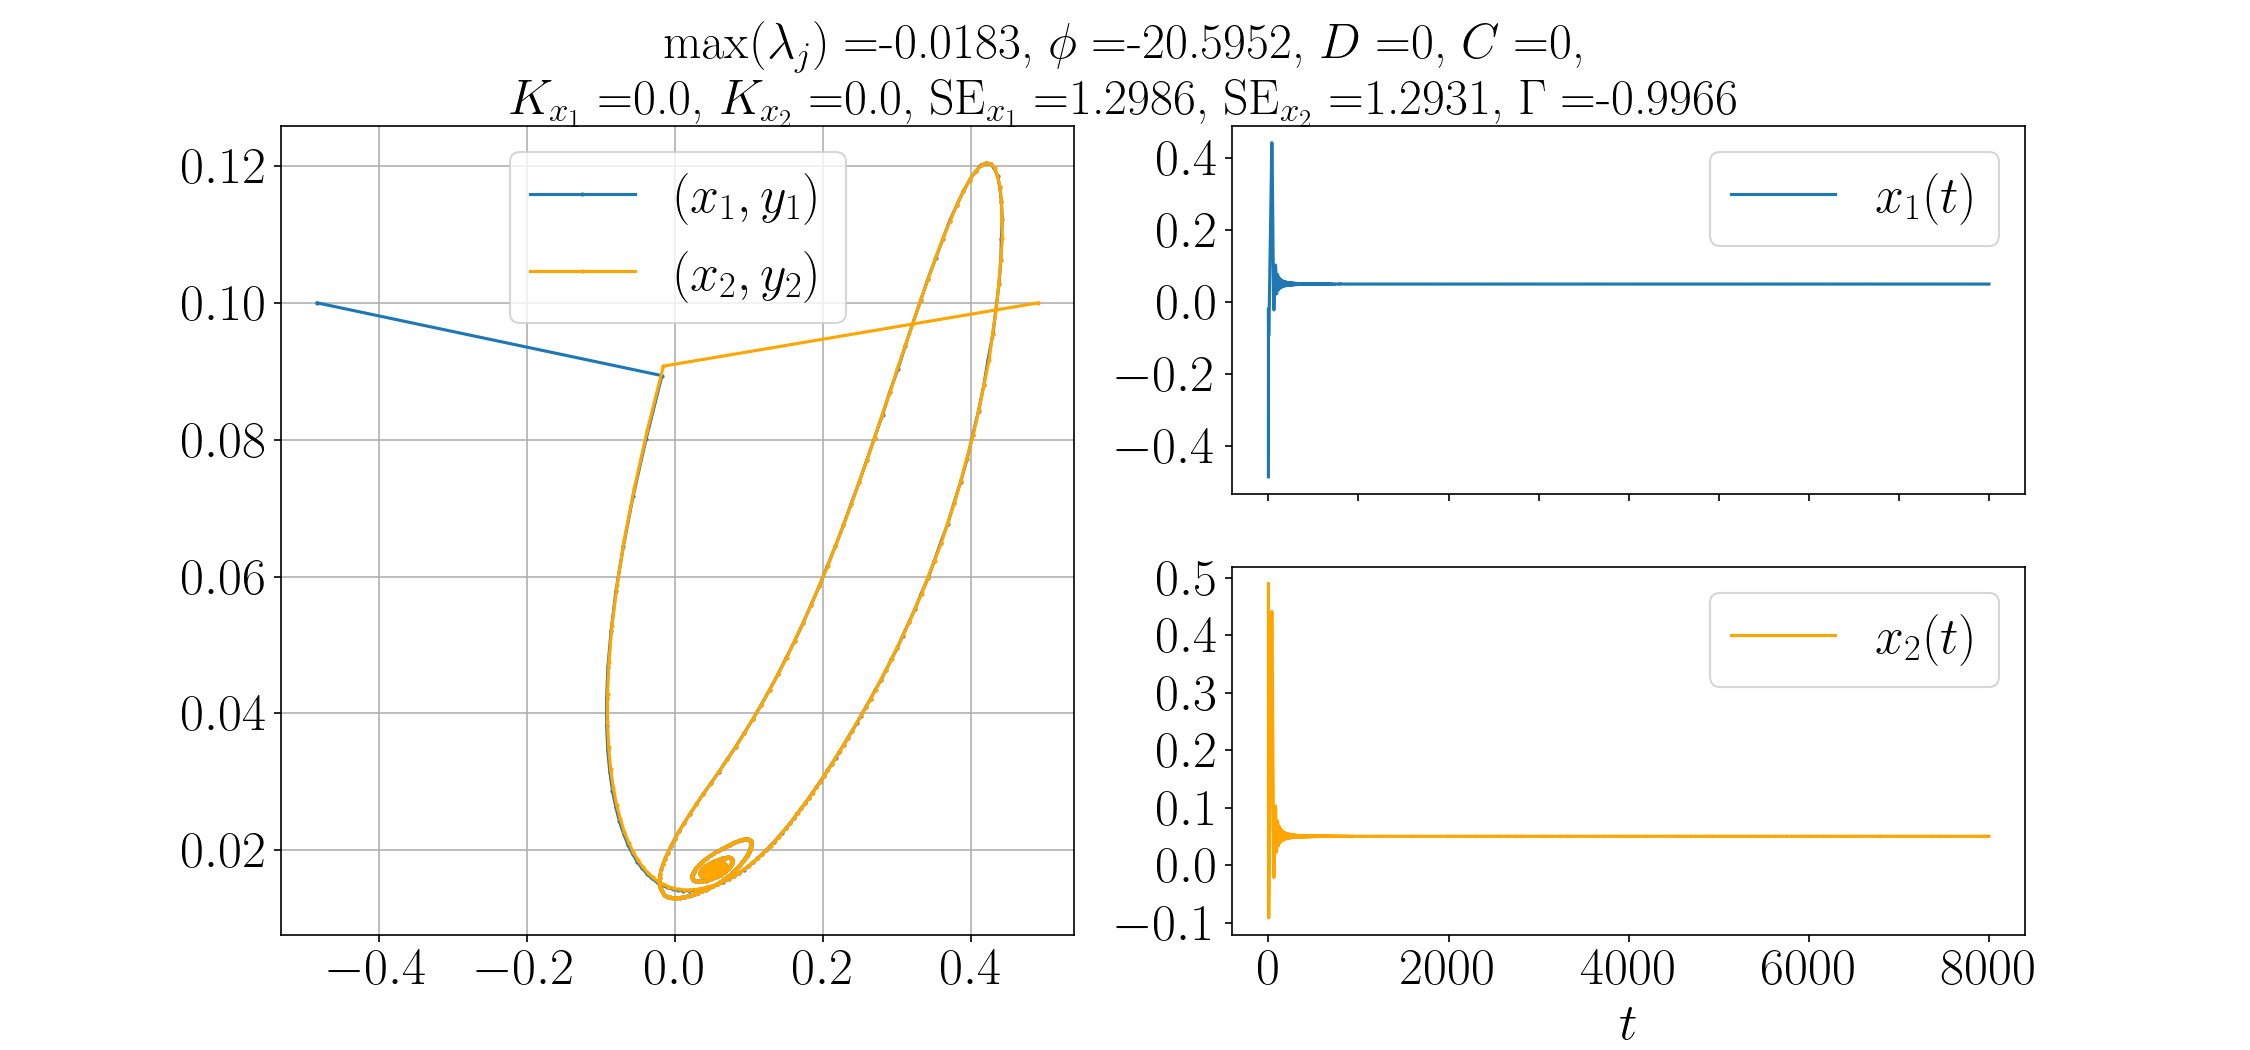

In [14]:
sz=25

#Coupling strengths and initial conditions, uncomment to run specific combinations.

# (a)
# theta= -15
# epsilon = 0.0002
# x1_0, x2_0 = -0.9218687378558665, -0.9992171957105551

# (b)
# theta= -1
# epsilon = 0.0002
# x1_0, x2_0 = 0.4527597457821808, 0.2773357182880365

# (c)
# theta= 0
# epsilon = 0.0002
# x1_0, x2_0 = 0.35648938703678557, 0.9338150727225494 

# (d)
# theta= 10
# epsilon = 0.0002
# x1_0, x2_0 = 0.4005054036640858, -0.6467214532276515 

# (e)
# theta= 0
# epsilon = 0.001
# x1_0, x2_0 = 0.5145228048003232, 0.12734399198161683

# (f)
# theta= 1
# epsilon = 0.001
# x1_0, x2_0 = 0.45826181884461525, 0.5160621031180332 

# (g)
# theta= -15
# epsilon = 0.1
# x1_0, x2_0 = -0.5515785740467718, -0.8655685250512053

# (h)
# theta= -1
# epsilon = 0.1
# x1_0, x2_0 = 0.09722955587344906, 0.34572064363118193

# (i)
# theta= 1
# epsilon = 0.1
# x1_0, x2_0 = -0.7801441227475816, -0.1739917385660965

# (j)
theta= 10
epsilon = 0.1
x1_0, x2_0 = -0.484082622776167, 0.49004047137942597


#parameters
A = 0.0041
alpha=5.276
gamma = 0.315

# initial guesses for y's and I's
y1_0 = 0.1
I1_0 = 0.012347

y2_0 = .1
I2_0 = 0.0484

TT, x1_sol, y1_sol, x2_sol, y2_sol, MLE, Dimension, Count, KK1, KK2, SE1, SE2, Cross_corr, Phi = analysis(theta, A, alpha, gamma, epsilon, x1_0, y1_0, I1_0, x2_0, y2_0, I2_0)

print("D = "+str(round(Dimension, 4)))
print("Kx1 = "+str(round(KK1, 4)))
print("Kx2 = "+str(round(KK2, 4)))

%matplotlib notebook

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(15, 7))
plt.suptitle("$\\max(\\lambda_j)=$"+str(round(MLE, 4))+", $\\phi=$"+str(round(Phi, 4))+", $D = $"+str(round(Dimension, 4))+", $C=$"+str(Count)+",\n $K_{x_1}=$"+str(round(KK1, 4))+", $K_{x_2}=$"+str(round(KK2, 4))+", ${\\rm SE}_{x_1}=$"+str(round(SE1, 4))+", ${\\rm SE}_{x_2}=$"+str(round(SE2, 4))+", $\\Gamma=$"+str(round(Cross_corr, 4))+"\n", size=sz-1)

ax = plt.subplot(gs[:, 0]) # span column 0
# plt.plot(x1_sol[5000:], y1_sol[5000:], 'o-', ms =1, label='$(x_1, y_1)$', rasterized=True)
# plt.plot(x2_sol[5000:], y2_sol[5000:], 'o-', ms=1,  label='$(x_2, y_2)$', color='orange', rasterized=True)

# #for 1i, 1j: run this two lines for figures 7(i), (j)
plt.plot(x1_sol, y1_sol, 'o-', ms =1, label='$(x_1, y_1)$', rasterized=True)
plt.plot(x2_sol, y2_sol, 'o-', ms=1,  label='$(x_2, y_2)$', color='orange', rasterized=True)

plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)
plt.legend(fontsize=sz)
plt.grid()
# plt.tight_layout()

ax = plt.subplot(gs[0, 1]) # row 0, column 1
plt.plot(TT, x1_sol, label = '$x_1(t)$')
plt.xticks(visible=False)
plt.yticks(size=sz)
plt.legend(fontsize=sz)

ax = plt.subplot(gs[1, 1]) # row 1, column 1
plt.plot(TT, x2_sol, color='orange', label = '$x_2(t)$')
plt.xlabel('$t$', size=sz)
plt.yticks(size=sz)
plt.xticks([0, 2000, 4000, 6000, 8000], size=sz)
plt.legend(fontsize=sz)


## Fig. 9 (0-1 test for chaos)

### Converted to the Python version by Anjana S. Nair from 01ChaosTest.jl. 
### The original Julia code can be found [here](https://github.com/amitg7/01ChaosTest.jl).

In [15]:
def pq(phi, c):
    imax = len(phi)
    p = np.zeros(imax)
    q = np.zeros(imax)
    p[0] = phi[0] * np.cos(c)
    q[0] = phi[0] * np.sin(c)
    for i in range(1, imax):
        p[i] = p[i-1] + phi[i-1]*np.cos(c * (i-1))
        q[i] = q[i-1] + phi[i-1]*np.sin(c * (i-1))
    return p,q


def Mn_c(phi, c, ncut):
    p, q = pq(phi, c)
    N = len(phi) - ncut
    Mn = np.zeros(ncut)
    for n in range(0, ncut):
        Mn[n] = np.mean([(p[j+n] - p[j])**2 + (q[j+n] - q[j])**2 for j in range(0, N)])
    return Mn

def Vosc_c(phi, c, ncut):
    E_phi = np.mean(phi)
    return [E_phi**2 * (1 - np.cos(n*c))/(1 - np.cos(c)) for n in range(0, ncut)]

def Dn_c(phi, c, ncut):
    return Mn_c(phi, c, ncut) - Vosc_c(phi, c, ncut)

def correlation_method(phi, ncut):
    eps = np.arange(1, ncut + 1)
    c_range = np.arange(0.01, 2*np.pi, 0.01)
    K_c = [pearsonr(eps, Dn_c(phi, c, ncut))[0] for c in c_range]
    valid_indices = np.where(~np.isnan(K_c))[0]
    return np.median(np.array(K_c)[valid_indices])

def Dn_c_tilde(phi, c, ncut):
    Dn = Dn_c(phi, c, ncut)
    return Dn - np.min(Dn)

def K_c(phi, c, ncut):
    Mn = Mn_c(phi, c, ncut)
    return np.log(Mn + 1e-5) / np.log(np.arange(1, ncut+1))

def Kc(phi, c, ncut):
    def linear_func(x, *p):
        return p[0] + p[1] * x

    fit_params, _ = curve_fit(linear_func, np.log(np.arange(1, ncut+1)), np.log(Dn_c_tilde(phi, c, ncut)[:ncut] + 1e-2), [0, 0.5])

    return fit_params[1]

def regression_method(phi, ncut):
    c_range = np.arange(0.01, 2*np.pi, 0.01)
    K_c_values = [Kc(phi, c, ncut) for c in c_range]
    return np.median(K_c_values)

In [17]:
A = 0.0041
alpha=5.276
gamma = 0.315

#Coupling strengths and initial conditions, uncomment to run specific combinations.

# (a)
# theta= -15
# epsilon = 0.0002
# x1_0, x2_0 = -0.9218687378558665, -0.9992171957105551

# (b)
# theta= -1
# epsilon = 0.0002
# x1_0, x2_0 = 0.4527597457821808, 0.2773357182880365

# (c)
# theta= 0
# epsilon = 0.0002
# x1_0, x2_0 = 0.35648938703678557, 0.9338150727225494 

# (d)
# theta= 10
# epsilon = 0.0002
# x1_0, x2_0 = 0.4005054036640858, -0.6467214532276515 

# (e)
# theta= 0
# epsilon = 0.001
# x1_0, x2_0 = 0.5145228048003232, 0.12734399198161683

# (f)
# theta= 1
# epsilon = 0.001
# x1_0, x2_0 = 0.45826181884461525, 0.5160621031180332 

# (g)
# theta= -15
# epsilon = 0.1
# x1_0, x2_0 = -0.5515785740467718, -0.8655685250512053

# (h)
# theta= -1
# epsilon = 0.1
# x1_0, x2_0 = 0.09722955587344906, 0.34572064363118193

# (i)
# theta= 1
# epsilon = 0.1
# x1_0, x2_0 = -0.7801441227475816, -0.1739917385660965

# (j)
theta= 10
epsilon = 0.1
x1_0, x2_0 = -0.484082622776167, 0.49004047137942597


def system(t, vars):
    x1, y1, I1, x2, y2, I2= vars
#     I10 = 1/60*(1+np.tanh((0.05-x1)/0.001))
#     I20 = 1/60*(1+np.tanh((0.05-x2)/0.001))
    dx1dt = x1**2 * (1 - x1) - y1 + I1+ theta * (x2 - x1)
    dy1dt = A * np.exp(alpha * x1) - gamma * y1
    dI1dt = epsilon*(1/60*(1+np.tanh((0.05-x1)/0.001)) - I1)
    dx2dt = x2**2 * (1 - x2) - y2 + I2 + theta * (x1 - x2)
    dy2dt = A * np.exp(alpha * x2) - gamma * y2
    dI2dt = epsilon*(1/60*(1+np.tanh((0.05-x2)/0.001)) - I2)

    return [dx1dt, dy1dt, dI1dt, dx2dt, dy2dt, dI2dt]

# Initial conditions
y1_0 = 0.1
I1_0 = 0.012347

y2_0 = .1
I2_0 = 0.0484

initial_conditions = [x1_0, y1_0, I1_0, x2_0, y2_0, I2_0]


# Time span for the solution
t_span = (0, 8000)  # from t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 20000)

# Solve the system of differential equations
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract solutions
x1_sol = solution.y[0]
y1_sol = solution.y[1]
I1_sol = solution.y[2]

x2_sol = solution.y[3]
y2_sol = solution.y[4]
I2_sol = solution.y[5]

c = 1.
ncut2 = 20

phi_x1 = x1_sol[18000:]
phi_y1 = y1_sol[18000:]
phi_x2 = x2_sol[18000:]
phi_y2 = y2_sol[18000:]

p_x1, q_x1 = pq(x1_sol[5000:], c)
p_y1, q_y1 = pq(y1_sol[5000:], c)

p_x2, q_x2 = pq(x2_sol[5000:], c)
p_y2, q_y2 = pq(y2_sol[5000:], c)
    
if theta <0:
    KK1 = correlation_method(phi_x1, ncut2)
    KK2 = correlation_method(phi_x2, ncut2)
else:
    KK1 = regression_method(phi_x1, ncut2)
    KK2 = regression_method(phi_x2, ncut2)
    
print(KK1, KK2)

2.754624609917892e-07 3.7299330523497046e-07


<IPython.core.display.Javascript object>


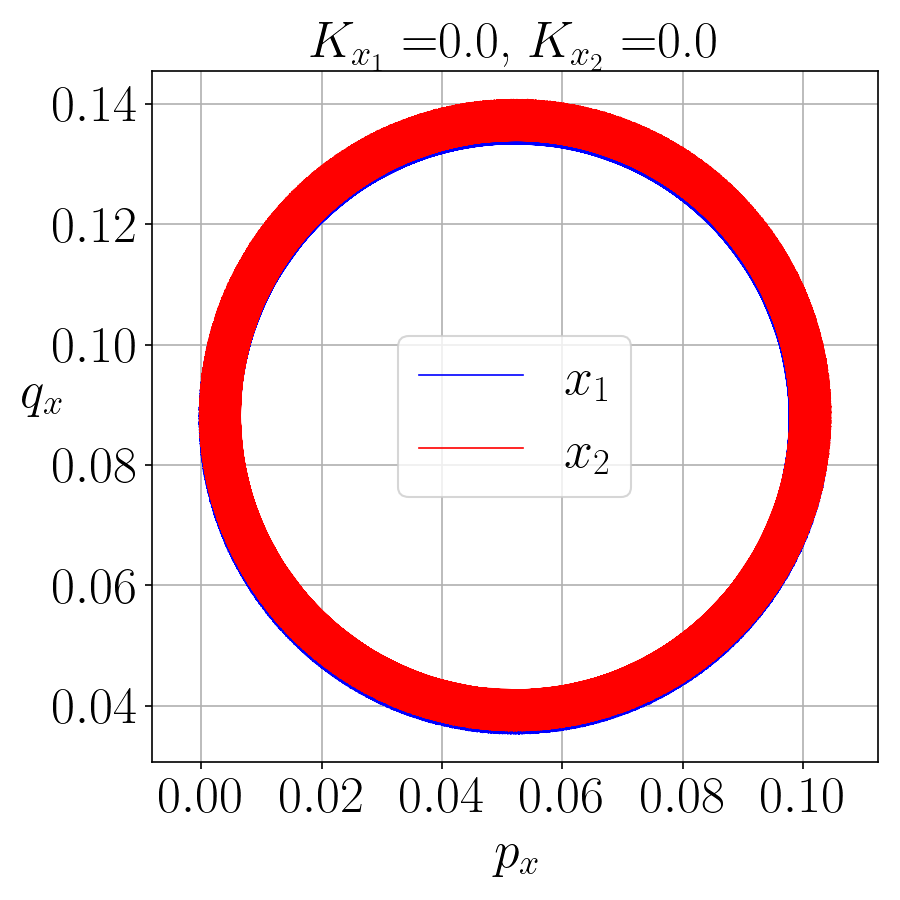

In [18]:
%matplotlib notebook

sz=25
# plt.plot(p_x1, q_x1, lw=0.2, c="b", label="$\phi$")
# plt.axis("equal")
# plt.yticks(fontsize=sz)
# plt.xticks(fontsize=sz)


# Plot the phase portraits
plt.figure(figsize=(6, 6))

# Phase portraits
plt.plot(p_x1, q_x1, lw=0.8, c="b", label="$x_1$", rasterized=True)
plt.plot(p_x2, q_x2, lw=0.8, c="r", label="$x_2$", rasterized=True)
plt.xlabel('$p_{x}$', size=sz)
plt.ylabel('$q_{x}$', rotation=False, size=sz)
plt.axis("equal")
plt.yticks(fontsize=sz)
plt.xticks(fontsize=sz)
plt.title("$K_{x_1} = $"+str(round(KK1, 4))+", $K_{x_2} = $"+str(round(KK2, 4)), size=sz)
plt.legend(fontsize=sz)
plt.grid()
plt.tight_layout()


## Fig. 10. (a) $\to$ (c)

<IPython.core.display.Javascript object>


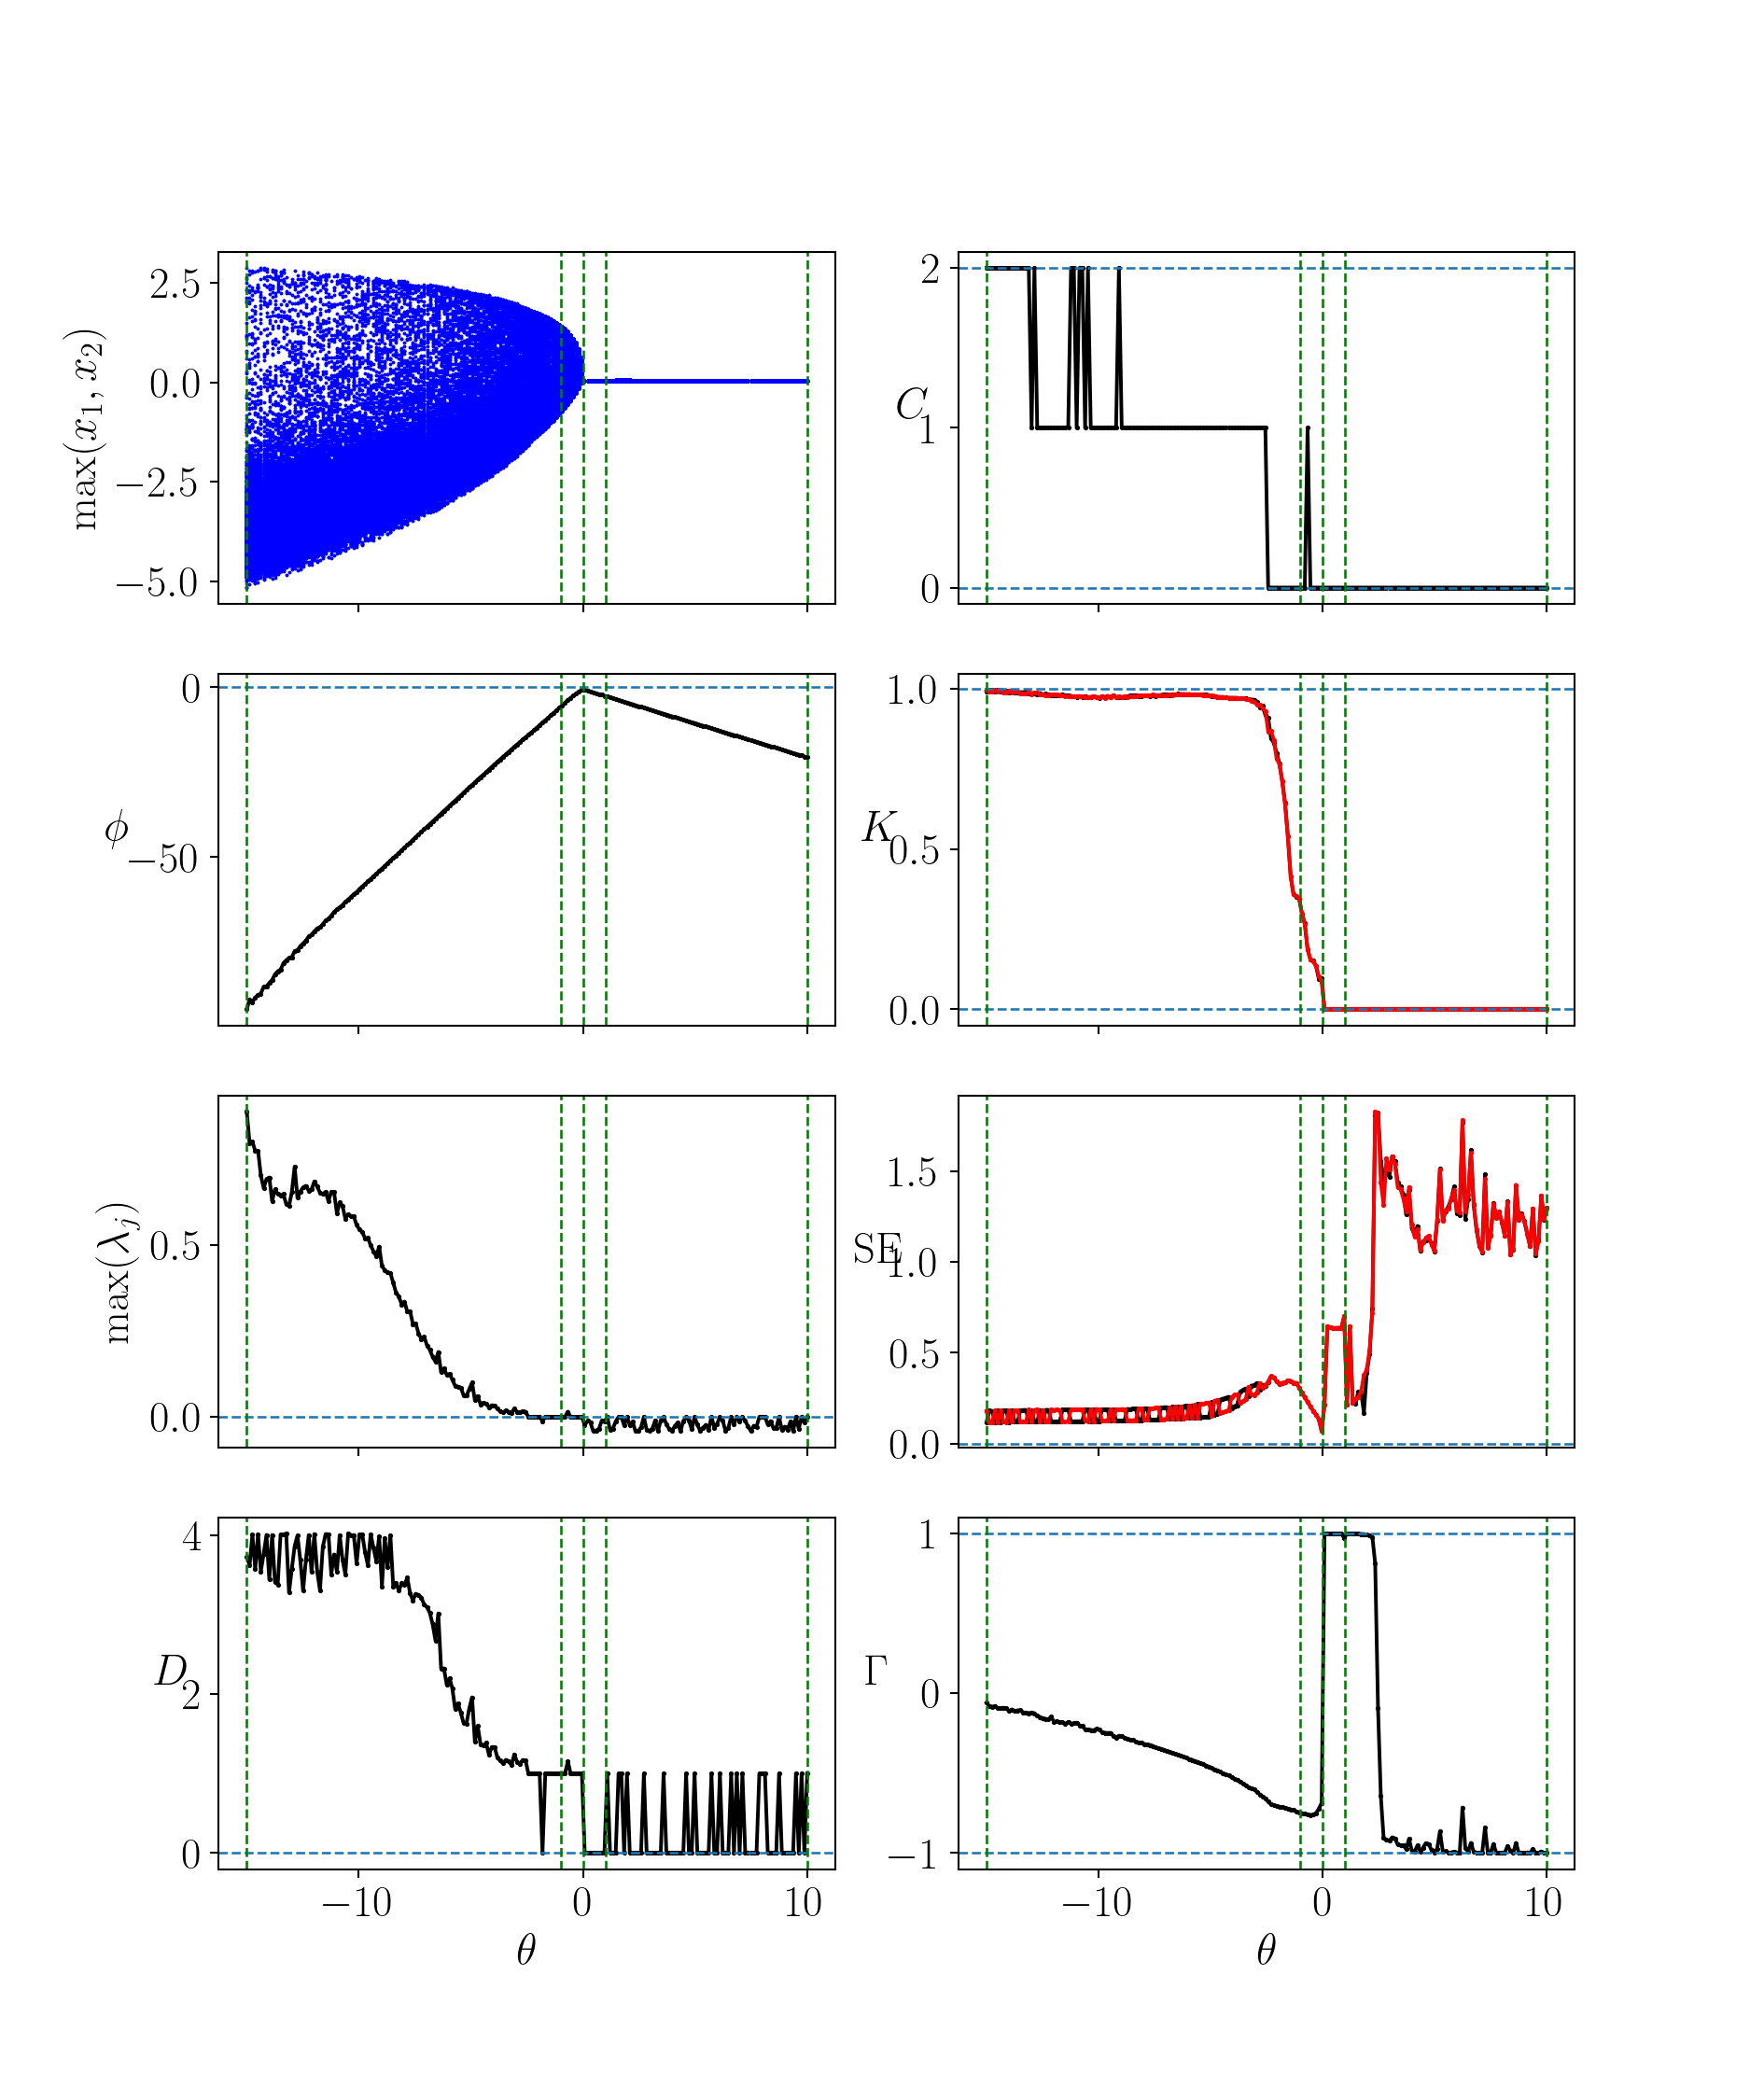

count = 1


C:\Users\ighosh\AppData\Local\Temp\ipykernel_9364\21435680.py:41: RuntimeWarning: overflow encountered in double_scalars
  def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)
C:\Users\ighosh\AppData\Local\Temp\ipykernel_9364\21435680.py:41: RuntimeWarning: overflow encountered in cosh
  def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)


mean of history2 = [  0.88730681   0.1444279   -0.09994322  -1.28910447 -25.60649343
 -68.76326553]
 
LL = [  0.8873   0.1444  -0.0999  -1.2891 -25.6065 -68.7633]
phi = -94.7271
C=2
-0.4899322829703159 -0.5175277582258158


C:\Users\ighosh\AppData\Local\Temp\ipykernel_9364\21435680.py:127: RuntimeWarning: overflow encountered in exp
  dy1dt = A * np.exp(Alpha * x1) - Gamma * y1
C:\Users\ighosh\AppData\Local\Temp\ipykernel_9364\21435680.py:130: RuntimeWarning: overflow encountered in exp
  dy2dt = A * np.exp(Alpha * x2) - Gamma * y2


KK1 = 0.9916220148613974
KK2 = 0.9966140852629339
count = 2
mean of history2 = [  0.79614684   0.16512495  -0.09995512  -1.37636368 -24.51636179
 -66.74600822]
 
LL = [  0.7961   0.1651  -0.1     -1.3764 -24.5164 -66.746 ]
phi = -91.7774
C=2
0.1026522899376634 0.2991193505587548
KK1 = 0.9962442161730325
KK2 = 0.9914306745990655
count = 3
mean of history2 = [  0.7994524    0.14638024  -0.09996493  -0.71663136 -24.32317045
 -68.39724168]
 
LL = [  0.7995   0.1464  -0.1     -0.7166 -24.3232 -68.3972]
phi = -92.5912
C=2
-0.6834039860739132 0.29780302454023433
KK1 = 0.9967614095003718
KK2 = 0.9925072316690906
count = 4
mean of history2 = [  0.7738034    0.10864227  -0.09995925  -1.36737263 -24.54983652
 -66.09928302]
 
LL = [  0.7738   0.1086  -0.1     -1.3674 -24.5498 -66.0993]
phi = -91.234
C=2
0.14013160443611916 0.7975153277441338
KK1 = 0.9910996615850997
KK2 = 0.995776306706724
count = 5
mean of history2 = [  0.77373516   0.07956894  -0.09992014  -0.48215828 -22.36488834
 -68.43746394]

KK1 = 0.9800746666984481
KK2 = 0.9780183284497395
count = 31
mean of history2 = [ 6.54193407e-01  2.42134348e-02 -9.99023204e-02 -1.13600017e+00
 -1.86317181e+01 -4.79937081e+01]
 
LL = [ 6.54200e-01  2.42000e-02 -9.99000e-02 -1.13600e+00 -1.86317e+01
 -4.79937e+01]
phi = -67.1829
C=2
0.7908924910902875 -0.466425880388573
KK1 = 0.9770384473631074
KK2 = 0.9779022775876466
count = 32
mean of history2 = [ 6.53005429e-01  2.65322085e-02 -9.99802064e-02 -7.65713153e-01
 -1.70771471e+01 -4.88206448e+01]
 
LL = [ 6.53000e-01  2.65000e-02 -1.00000e-01 -7.65700e-01 -1.70771e+01
 -4.88206e+01]
phi = -66.0839
C=2
0.632763108128086 0.6895912945744826
KK1 = 0.9754141681533128
KK2 = 0.9758345678794452
count = 33
mean of history2 = [ 5.91679296e-01 -8.30613383e-03 -9.99012690e-02 -9.08876337e-01
 -1.74237282e+01 -4.75285936e+01]
 
LL = [  0.5917   0.      -0.0999  -0.9089 -17.4237 -47.5286]
phi = -65.3694
C=1
0.9442385018077093 -0.8805698327776716
KK1 = 0.9748059367464103
KK2 = 0.9772238209469533
cou

KK1 = 0.9798046197097654
KK2 = 0.9783412966247993
count = 58
mean of history2 = [ 3.05830235e-01 -2.43796861e-02 -9.99552507e-02 -3.89494342e-01
 -1.17017945e+01 -3.45093190e+01]
 
LL = [ 3.05800e-01 -2.44000e-02 -1.00000e-01 -3.89500e-01 -1.17018e+01
 -3.45093e+01]
phi = -46.4191
C=1
-0.3549261693346024 0.47587426276787337
KK1 = 0.9785501044919631
KK2 = 0.9781420718855907
count = 59
mean of history2 = [  0.30714942  -0.04088093  -0.09985088  -0.62105001 -10.86246784
 -34.31194211]
 
LL = [  0.3071  -0.0409  -0.0999  -0.6211 -10.8625 -34.3119]
phi = -45.629
C=1
0.8459278151168748 -0.02570876030960223
KK1 = 0.9768703439080776
KK2 = 0.9787789559176486
count = 60
mean of history2 = [ 2.69730263e-01 -2.91304555e-02 -9.98629721e-02 -7.73545409e-01
 -1.15162017e+01 -3.27302212e+01]
 
LL = [ 2.69700e-01 -2.91000e-02 -9.99000e-02 -7.73500e-01 -1.15162e+01
 -3.27302e+01]
phi = -44.8792
C=1
-0.5852313739724682 -0.97101268106961
KK1 = 0.9782664000370809
KK2 = 0.9812179404338203
count = 61
mean of

KK1 = 0.9725793925632271
KK2 = 0.972714358047022
count = 87
mean of history2 = [  0.02808229  -0.12179636  -0.11978725  -0.25965507  -3.89071839
 -19.84089045]
 
LL = [  0.0281  -0.1198  -0.1218  -0.2597  -3.8907 -19.8409]
phi = -24.2048
C=1
-0.665538629886762 -0.03850466577798439
KK1 = 0.9721486641317465
KK2 = 0.9708148942433387
count = 88
mean of history2 = [  0.03392834  -0.15494467  -0.10174084  -0.24246702  -3.639497
 -19.32008885]
 
LL = [  0.0339  -0.1017  -0.1549  -0.2425  -3.6395 -19.3201]
phi = -23.4248
C=1
0.2533067466640193 0.048724117372002995
KK1 = 0.9719571362315245
KK2 = 0.9715173880365346
count = 89
mean of history2 = [  0.03295136  -0.13929033  -0.09880767  -0.25592698  -3.42436046
 -18.77360449]
 
LL = [  0.033   -0.0988  -0.1393  -0.2559  -3.4244 -18.7736]
phi = -22.659
C=1
0.14266494635034488 0.06202844327637158
KK1 = 0.9713200381780993
KK2 = 0.9718472683769201
count = 90
mean of history2 = [  0.02398383  -0.15313004  -0.12135518  -0.37046665  -3.28398256
 -18.0492

KK1 = 0.2678449233547232
KK2 = 0.26769889008298214
count = 115
mean of history2 = [ 0.01514794 -0.11073036 -0.09898538 -0.27126037 -0.52133    -2.78144333]
 
LL = [ 0.0151 -0.099  -0.1107 -0.2713 -0.5213 -2.7814]
phi = -3.7686
C=1
0.45552554646339916 0.7593300908152698
KK1 = 0.18708795761279431
KK2 = 0.18806671438941033
count = 116
mean of history2 = [-1.59796347e-03 -1.20934445e-01 -9.88269181e-02 -2.62528478e-01
 -3.00824302e-01 -2.40033623e+00]
 
LL = [ 0.     -0.0988 -0.1209 -0.2625 -0.3008 -2.4003]
phi = -3.1835
C=0
-0.29670191844647986 0.27170101973478245
KK1 = 0.1551861349034633
KK2 = 0.15606553076347526
count = 117
mean of history2 = [ 0.00586451 -0.11685225 -0.09954218 -0.26417099 -0.28899848 -1.71055548]
 
LL = [ 0.     -0.0995 -0.1169 -0.2642 -0.289  -1.7106]
phi = -2.4801
C=0
0.2201147516557287 0.031578823831510894
KK1 = 0.15205195284618817
KK2 = 0.1496055138732045
count = 118
mean of history2 = [ 0.00259494 -0.11030953 -0.1024121  -0.27596076 -0.26070277 -1.1065789 ]
 
LL 

KK1 = 3.6297168839415737e-07
KK2 = 6.295930231121877e-07
count = 145
mean of history2 = [-0.03412513 -0.04160232 -0.13245759 -0.31102744 -0.6969155  -5.59077363]
 
LL = [-0.0341 -0.0416 -0.1325 -0.311  -0.6969 -5.5908]
phi = -6.8069
C=0
-0.29415284991913127 -0.37441109326241784
KK1 = 3.6100598691320467e-07
KK2 = 3.643718817225583e-07
count = 146
mean of history2 = [-0.01087625 -0.032012   -0.14257214 -0.32538477 -0.92897646 -5.59914698]
 
LL = [-0.0109 -0.032  -0.1426 -0.3254 -0.929  -5.5991]
phi = -7.039
C=0
0.554431568714383 0.2662892684265783
KK1 = 6.153988730739607e-07
KK2 = 2.558723127543683e-07
count = 147
mean of history2 = [-0.04548534 -0.0411003  -0.13030795 -0.3245166  -0.73118319 -6.0580724 ]
 
LL = [-0.0411 -0.0455 -0.1303 -0.3245 -0.7312 -6.0581]
phi = -7.3307
C=0
-0.9892983311547017 -0.8517733588210206
KK1 = 5.140540014805656e-07
KK2 = 1.5599661168375079e-07
count = 148
mean of history2 = [-0.01036056 -0.04012972 -0.13762514 -0.31317377 -0.67646238 -6.38618365]
 
LL = [-0

KK1 = 8.764060790114778e-07
KK2 = 4.1289175511938225e-07
count = 174
mean of history2 = [ -0.02056384  -0.04260575  -0.11735253  -0.31718603  -1.15420602
 -12.41942203]
 
LL = [ -0.0206  -0.0426  -0.1174  -0.3172  -1.1542 -12.4194]
phi = -14.0713
C=0
0.5779189239158944 -0.7060431887977567
KK1 = 2.1279079062104257e-07
KK2 = 4.3423534229480865e-07
count = 175
mean of history2 = [ 8.82585420e-03 -4.54600363e-02 -1.16281738e-01 -2.96893902e-01
 -3.15911211e-01 -1.35429749e+01]
 
LL = [  0.      -0.0455  -0.1163  -0.2969  -0.3159 -13.543 ]
phi = -14.3175
C=0
0.5107104384736982 -0.2962283558593517
KK1 = 2.239693166840507e-07
KK2 = 1.8271399330947556e-07
count = 176
mean of history2 = [-1.22116000e-02 -2.93742943e-02 -1.19839469e-01 -3.01073201e-01
 -3.16669291e-01 -1.37826732e+01]
 
LL = [-1.22000e-02 -2.94000e-02 -1.19800e-01 -3.01100e-01 -3.16700e-01
 -1.37827e+01]
phi = -14.5618
C=0
0.8930693894965869 -0.17436823401123624
KK1 = 8.537832146826574e-08
KK2 = 3.9041580265908316e-07
count = 17

KK1 = 1.0930110572182627e-07
KK2 = 5.772644706414365e-07


In [22]:
%matplotlib notebook

# epsilon = 0.0002 (a)
# epsilon = 0.001 (b)
epsilon = 0.1 (c)

A = 0.0041
alpha=5.276
gamma = 0.315

THETA_f = np.linspace(-15, 10, 200)
sz=18
matplotlib.rc('xtick', labelsize=sz) 
matplotlib.rc('ytick', labelsize=sz)

fig, axs = plt.subplots(4,2, figsize=(10, 12), sharex=True)

axs[3, 0].set_xlabel('$\\theta$', fontsize=sz)
axs[3, 1].set_xlabel('$\\theta$', fontsize=sz)
axs[0, 0].set_ylabel('$\\max(x_1, x_2)$',fontsize=sz)
axs[1, 0].set_ylabel('$\\phi$',rotation=False, fontsize=sz)
axs[2, 0].set_ylabel('${\\max}(\\lambda_j)$',fontsize=sz)
axs[3, 0].set_ylabel('$D$',rotation=False, fontsize=sz)
axs[0, 1].set_ylabel('$C$',rotation=False, fontsize=sz)
axs[1, 1].set_ylabel('$K$',rotation=False, fontsize=sz)
axs[2, 1].set_ylabel('${\\rm SE}$',rotation=False, fontsize=sz)
axs[3, 1].set_ylabel('$\\Gamma$',rotation=False, fontsize=sz)

count = 1
Diss= []
MLE = []
DD = []
CC = []
K1= []
K2 = []
SE1= []
SE2 = []
Cross = []

for theta in THETA_f:
    
    # Initial conditions
    x1_0 = np.random.uniform(low=-1, high=1)
    y1_0 = 0.1
    I1_0 = 0.012347
    x2_0 = np.random.uniform(low=-1, high=1)
    y2_0 = .1
    I2_0 = 0.0484
      
    print("count = "+str(count))
    TT, x1_sol, y1_sol, x2_sol, y2_sol, mle, dd, cc, KK1, KK2, se1, se2, Cross_corr, Phi = analysis(theta, A, alpha, gamma, epsilon, x1_0, y1_0, I1_0, x2_0, y2_0, I2_0)
    X1 = x1_sol[19501:]
    X2 = x2_sol[19501:]
    X_max = np.maximum(X1, X2)
    print("KK1 = "+str(KK1))
    print("KK2 = "+str(KK2))
    axs[0, 0].plot([Theta]*len(X_max), X_max, 'bo', ms=0.5, rasterized=True)
    Diss+=[Phi, ]
    MLE+=[mle, ]
    DD+=[dd, ]
    CC+=[cc, ]
    K1+=[KK1, ]
    K2+=[KK2, ]
    SE1+=[se1, ]
    SE2+=[se2, ]
    Cross+=[Cross_corr, ]
    count+=1
    
axs[1, 0].plot(THETA_f, Diss, 'ko-', ms=1)
axs[2, 0].plot(THETA_f, MLE, 'ko-', ms=1)
axs[3, 0].plot(THETA_f, DD, 'ko-', ms=1)
axs[0, 1].plot(THETA_f, CC, 'ko-', ms=1)
axs[1, 1].plot(THETA_f, K1, 'ko-', ms=1)
axs[1, 1].plot(THETA_f, K2, 'ro-', ms=1)
axs[2, 1].plot(THETA_f, SE1, 'ko-', ms=1)
axs[2, 1].plot(THETA_f, SE2, 'ro-', ms=1)
axs[3, 1].plot(THETA_f, Cross, 'ko-', ms=1)

axs[1, 0].axhline(y=0, linewidth=1, linestyle='--')
axs[2, 0].axhline(y=0, linewidth=1, linestyle='--')
axs[1, 1].axhline(y=1, linewidth=1, linestyle='--')
axs[1, 1].axhline(y=0, linewidth=1, linestyle='--')
axs[3, 1].axhline(y=1, linewidth=1, linestyle='--')
axs[3, 1].axhline(y=-1, linewidth=1, linestyle='--')

axs[3, 0].axhline(y=0, linewidth=1, linestyle='--')
axs[0, 1].axhline(y=0, linewidth=1, linestyle='--')
axs[2, 1].axhline(y=0, linewidth=1, linestyle='--')
axs[0, 1].axhline(y=2, linewidth=1, linestyle='--')

axs[0, 0].axvline(x=-15, linewidth=1, linestyle='--', color='green')
axs[0, 0].axvline(x=-1, linewidth=1, linestyle='--', color='green')
axs[0, 0].axvline(x=0, linewidth=1, linestyle='--', color='green')
axs[0, 0].axvline(x=1, linewidth=1, linestyle='--', color='green')
axs[0, 0].axvline(x=10, linewidth=1, linestyle='--', color='green')

axs[1, 0].axvline(x=-15, linewidth=1, linestyle='--', color='green')
axs[1, 0].axvline(x=-1, linewidth=1, linestyle='--', color='green')
axs[1, 0].axvline(x=0, linewidth=1, linestyle='--', color='green')
axs[1, 0].axvline(x=1, linewidth=1, linestyle='--', color='green')
axs[1, 0].axvline(x=10, linewidth=1, linestyle='--', color='green')

axs[2, 0].axvline(x=-15, linewidth=1, linestyle='--', color='green')
axs[2, 0].axvline(x=-1, linewidth=1, linestyle='--', color='green')
axs[2, 0].axvline(x=0, linewidth=1, linestyle='--', color='green')
axs[2, 0].axvline(x=1, linewidth=1, linestyle='--', color='green')
axs[2, 0].axvline(x=10, linewidth=1, linestyle='--', color='green')

axs[3, 0].axvline(x=-15, linewidth=1, linestyle='--', color='green')
axs[3, 0].axvline(x=-1, linewidth=1, linestyle='--', color='green')
axs[3, 0].axvline(x=0, linewidth=1, linestyle='--', color='green')
axs[3, 0].axvline(x=1, linewidth=1, linestyle='--', color='green')
axs[3, 0].axvline(x=10, linewidth=1, linestyle='--', color='green')

axs[0, 1].axvline(x=-15, linewidth=1, linestyle='--', color='green')
axs[0, 1].axvline(x=-1, linewidth=1, linestyle='--', color='green')
axs[0, 1].axvline(x=0, linewidth=1, linestyle='--', color='green')
axs[0, 1].axvline(x=1, linewidth=1, linestyle='--', color='green')
axs[0, 1].axvline(x=10, linewidth=1, linestyle='--', color='green')

axs[1, 1].axvline(x=-15, linewidth=1, linestyle='--', color='green')
axs[1, 1].axvline(x=-1, linewidth=1, linestyle='--', color='green')
axs[1, 1].axvline(x=0, linewidth=1, linestyle='--', color='green')
axs[1, 1].axvline(x=1, linewidth=1, linestyle='--', color='green')
axs[1, 1].axvline(x=10, linewidth=1, linestyle='--', color='green')

axs[2, 1].axvline(x=-15, linewidth=1, linestyle='--', color='green')
axs[2, 1].axvline(x=-1, linewidth=1, linestyle='--', color='green')
axs[2, 1].axvline(x=0, linewidth=1, linestyle='--', color='green')
axs[2, 1].axvline(x=1, linewidth=1, linestyle='--', color='green')
axs[2, 1].axvline(x=10, linewidth=1, linestyle='--', color='green')

axs[3, 1].axvline(x=-15, linewidth=1, linestyle='--', color='green')
axs[3, 1].axvline(x=-1, linewidth=1, linestyle='--', color='green')
axs[3, 1].axvline(x=0, linewidth=1, linestyle='--', color='green')
axs[3, 1].axvline(x=1, linewidth=1, linestyle='--', color='green')
axs[3, 1].axvline(x=10, linewidth=1, linestyle='--', color='green')




## Fig. 10 (d)

<IPython.core.display.Javascript object>


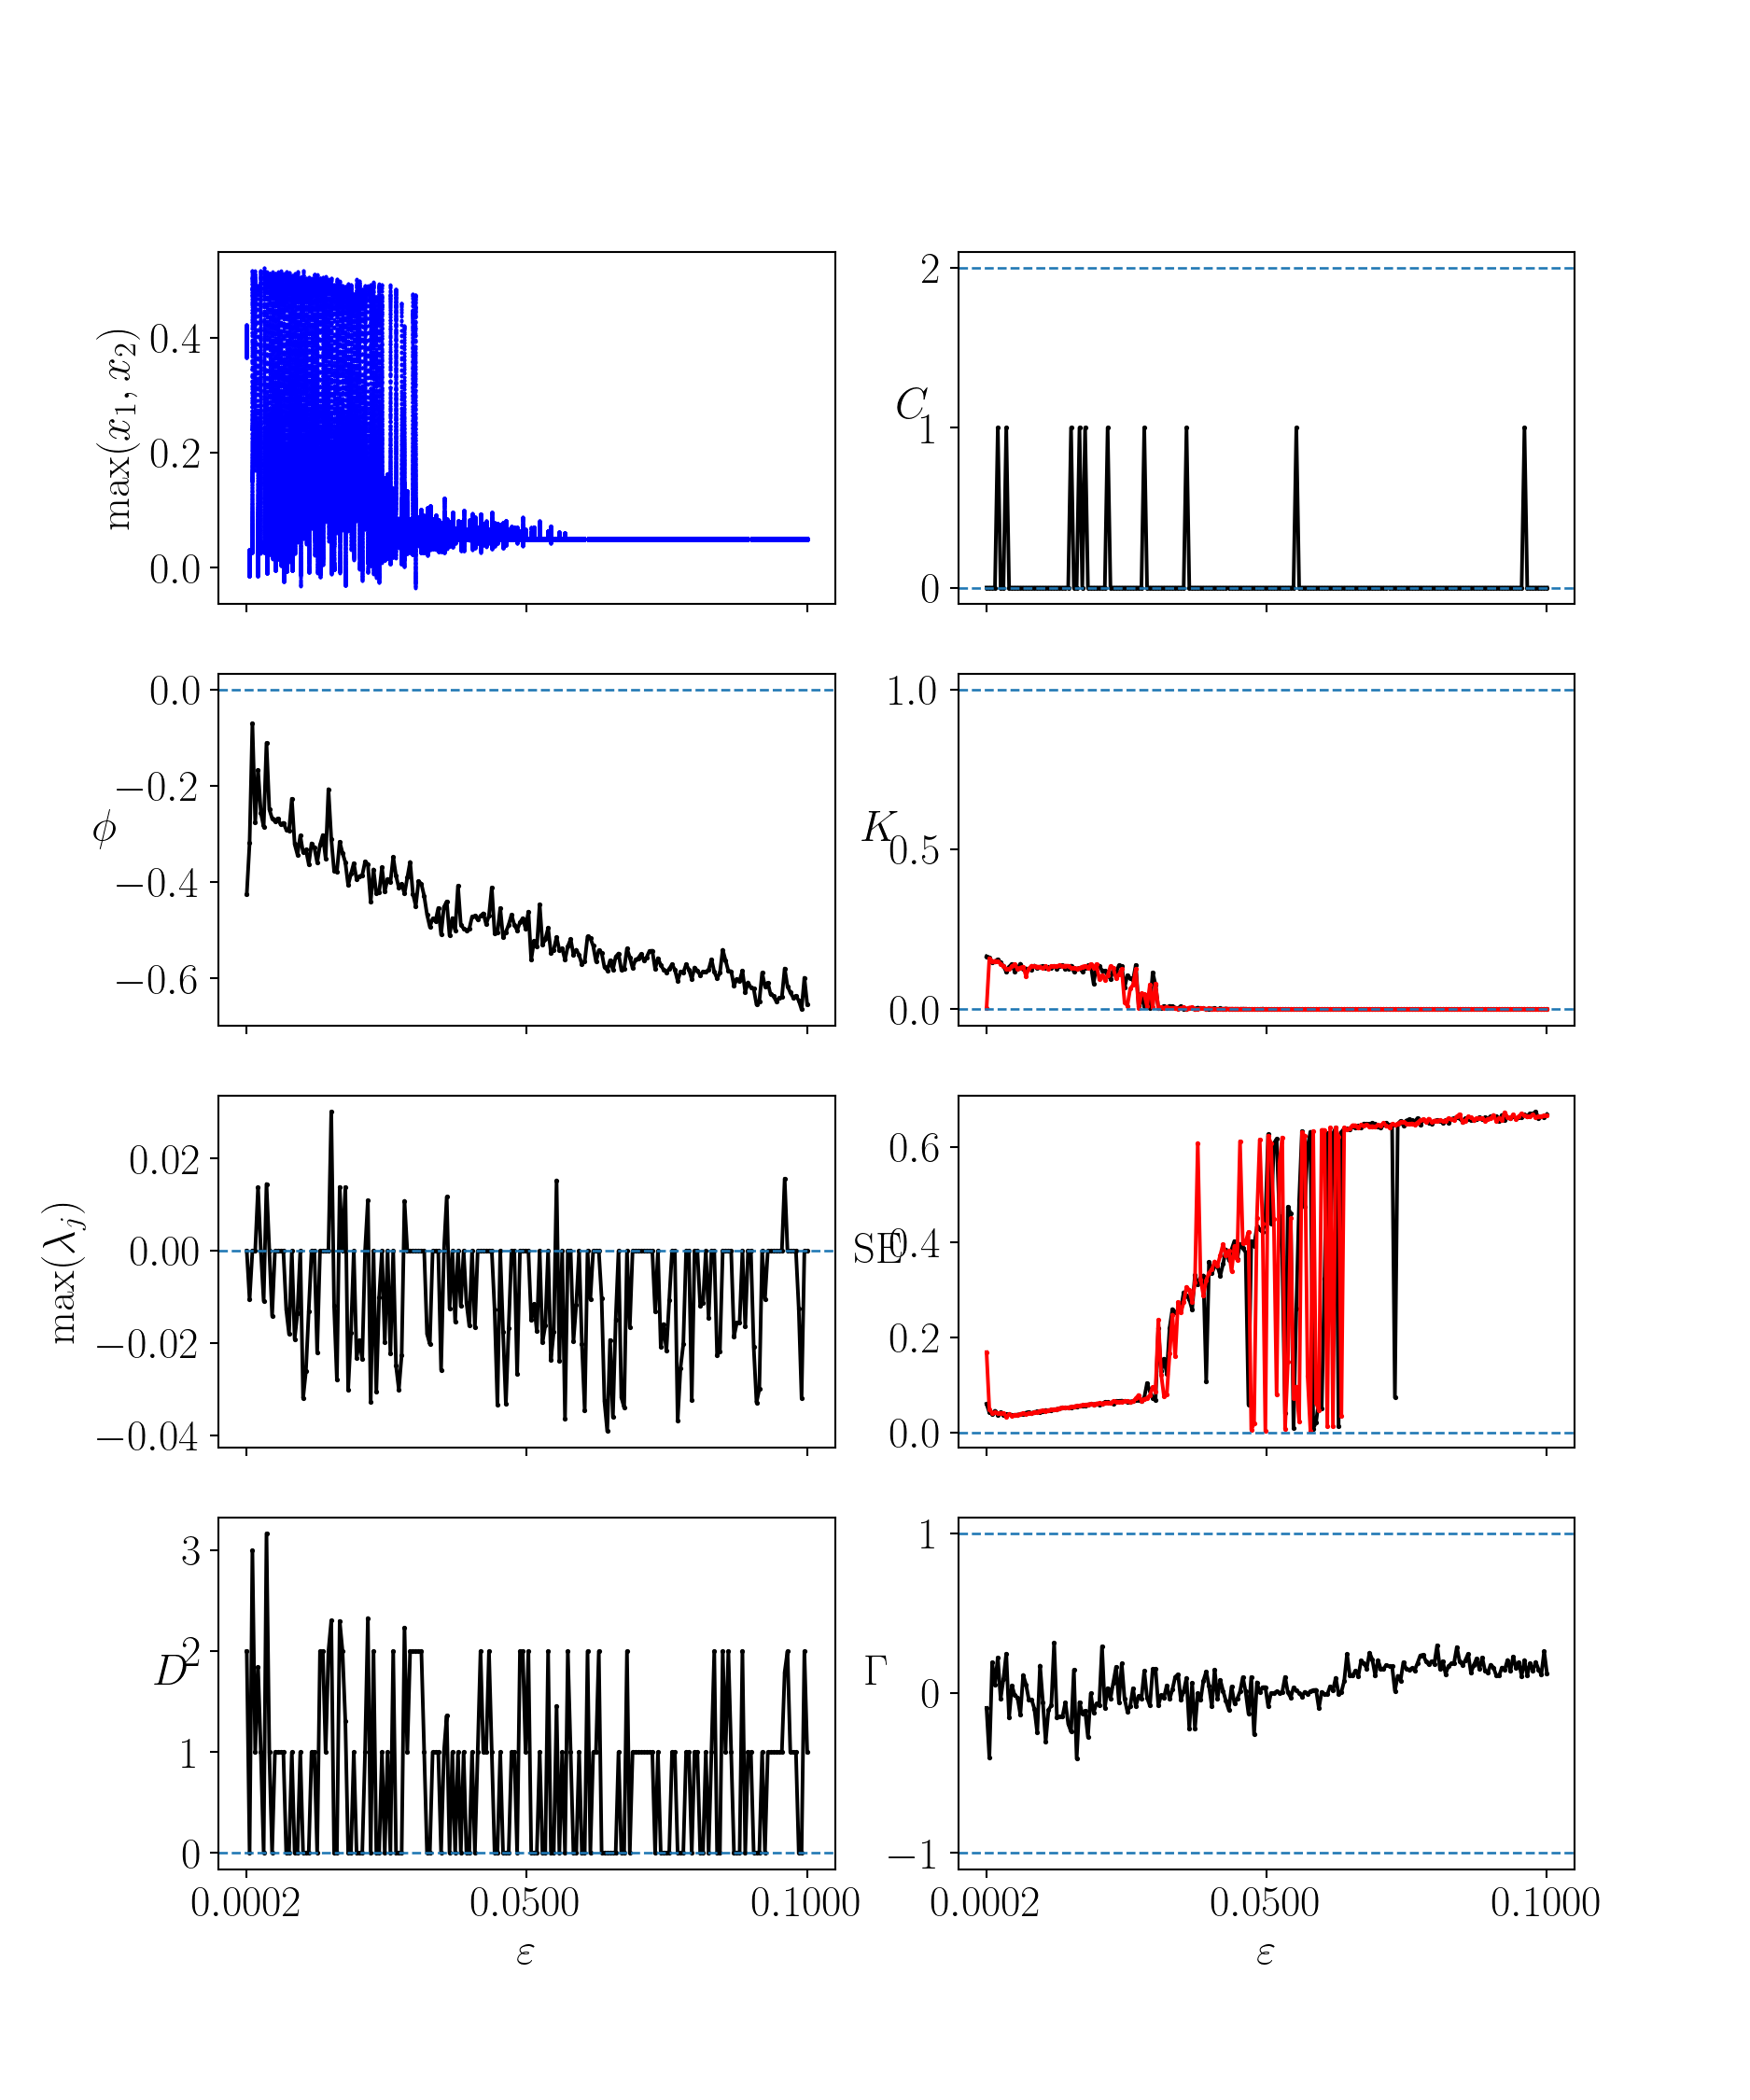

count = 1


C:\Users\ighosh\AppData\Local\Temp\ipykernel_33056\21435680.py:41: RuntimeWarning: overflow encountered in double_scalars
  def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)


mean of history2 = [-1.26795583e-01 -2.16130081e-01 -2.00000001e-04 -4.15911779e-02
 -4.07503104e-02 -3.59486401e-03]
 
LL = [ 0.      0.     -0.0408 -0.0416 -0.1268 -0.2161]
phi = -0.4253
C=0
-0.12961824578685155 -0.6421954638698959
KK1 = 0.16622012701520494
KK2 = 0.0032076400884504253
count = 2


C:\Users\ighosh\AppData\Local\Temp\ipykernel_33056\21435680.py:41: RuntimeWarning: overflow encountered in cosh
  def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)


mean of history2 = [-0.01053517 -0.0799767  -0.15526878 -0.02390999 -0.03769102 -0.01068484]
 
LL = [-0.0105 -0.0107 -0.0239 -0.0377 -0.08   -0.1553]
phi = -0.3181
C=0
0.5301101132042776 0.7897832622380974


C:\Users\ighosh\AppData\Local\Temp\ipykernel_33056\21435680.py:127: RuntimeWarning: overflow encountered in exp
  dy1dt = A * np.exp(Alpha * x1) - Gamma * y1


KK1 = 0.16232851547137728
KK2 = 0.16017654773771822
count = 3
mean of history2 = [ 0.00424844 -0.00017443 -0.0013446  -0.02422059 -0.03452146 -0.01121473]
 
LL = [ 0.      0.      0.     -0.0112 -0.0242 -0.0345]
phi = -0.07
C=0
0.38463496830314403 0.7979522241219863
KK1 = 0.14879140009756847
KK2 = 0.15044722449652398
count = 4
mean of history2 = [-0.05919434 -0.1068961  -0.04259554 -0.03088727 -0.03514627 -0.00301782]
 
LL = [ 0.     -0.0309 -0.0351 -0.0426 -0.0592 -0.1069]
phi = -0.2747
C=0
-0.4508911582645465 -0.3369702247427384
KK1 = 0.15047688957803598
KK2 = 0.15171258688946088
count = 5
mean of history2 = [ 0.01376726 -0.05631574 -0.04710102 -0.03222053 -0.02842767 -0.01637262]
 
LL = [ 0.0138 -0.0164 -0.0284 -0.0322 -0.0471 -0.0563]
phi = -0.1667
C=1
0.4448341488296381 0.922050262089571
KK1 = 0.15649935818779176
KK2 = 0.14991629057210387
count = 6
mean of history2 = [-0.04829207 -0.09385102 -0.06707491 -0.01444044 -0.0316946  -0.00222945]
 
LL = [ 0.     -0.0144 -0.0317 -0.0483 -

C:\Users\ighosh\AppData\Local\Temp\ipykernel_33056\21435680.py:130: RuntimeWarning: overflow encountered in exp
  dy2dt = A * np.exp(Alpha * x2) - Gamma * y2


KK1 = 0.14220525996623845
KK2 = 0.1343827917983236
count = 11
mean of history2 = [-0.05478216 -0.06556655 -0.10202897 -0.02056772 -0.03037295 -0.00268029]
 
LL = [ 0.     -0.0206 -0.0304 -0.0548 -0.0656 -0.102 ]
phi = -0.2733
C=0
-0.9708462317517972 -0.2698584007643696
KK1 = 0.11774549671173923
KK2 = 0.14170595487302676
count = 12
mean of history2 = [-0.01068113 -0.04547024 -0.14865382 -0.03030674 -0.03225809 -0.00348928]
 
LL = [ 0.     -0.0107 -0.0303 -0.0323 -0.0455 -0.1487]
phi = -0.2674
C=0
0.5794439162151788 -0.8713763520352353
KK1 = 0.12826390653138417
KK2 = 0.12672823475672357
count = 13
mean of history2 = [-0.04664519 -0.06638593 -0.11622295 -0.01629012 -0.03444901 -0.00633284]
 
LL = [ 0.     -0.0163 -0.0344 -0.0466 -0.0664 -0.1162]
phi = -0.28
C=0
-0.5911808390956066 -0.18997602312107498
KK1 = 0.14289714631921147
KK2 = 0.1309863802318958
count = 14
mean of history2 = [-0.01152471 -0.05851188 -0.14635094  0.00312209 -0.04229862 -0.01789218]
 
LL = [ 0.     -0.0115 -0.0179 -0.

KK1 = 0.13696613162991875
KK2 = 0.0958593716306455
count = 42
mean of history2 = [-0.04063363 -0.04752458 -0.12494217 -0.02343994 -0.06665318 -0.0823301 ]
 
LL = [-0.0234 -0.0406 -0.0475 -0.0667 -0.0823 -0.1249]
phi = -0.3855
C=0
-0.18535364498883689 -0.7035313804274632
KK1 = 0.12182171765807057
KK2 = 0.10667316421713954
count = 43
mean of history2 = [-0.04247831 -0.0481973  -0.12463631  0.0040469  -0.03966572 -0.10245195]
 
LL = [ 0.     -0.0397 -0.0425 -0.0482 -0.1025 -0.1246]
phi = -0.3574
C=0
-0.26301574890441315 0.1916127665246432
KK1 = 0.11989861888715014
KK2 = 0.09250391984213563
count = 44
mean of history2 = [ 0.01097233 -0.03330778 -0.17170757 -0.00396298 -0.03636012 -0.13179782]
 
LL = [ 0.011   0.     -0.0333 -0.0364 -0.1318 -0.1717]
phi = -0.3622
C=1
0.27856825447288713 0.7011261724918763
KK1 = 0.10787828886815568
KK2 = 0.10612909918420853
count = 45
mean of history2 = [-0.05091296 -0.05045339 -0.1239281  -0.03275102 -0.03850174 -0.1440349 ]
 
LL = [-0.0328 -0.0385 -0.0505 

mean of history2 = [ 0.01169913 -0.03360367 -0.15927685 -0.03227876 -0.03367126 -0.1928646 ]
 
LL = [ 0.0117 -0.0323 -0.0336 -0.0337 -0.1593 -0.1929]
phi = -0.44
C=1
0.4225905952708704 -0.9722632272229554
KK1 = 0.0017744029957126872
KK2 = 0.0019783279766686646
count = 73
mean of history2 = [-0.01590336 -0.05357614 -0.19558763 -0.01244395 -0.04896321 -0.18388863]
 
LL = [-0.0124 -0.0159 -0.049  -0.0536 -0.1839 -0.1956]
phi = -0.5104
C=0
0.9718186389027943 0.8832440895469129
KK1 = 0.003424067208503634
KK2 = 0.005575486866639945
count = 74
mean of history2 = [-0.03624213 -0.04148707 -0.17053931 -0.009234   -0.03239775 -0.19384387]
 
LL = [ 0.     -0.0324 -0.0362 -0.0415 -0.1705 -0.1938]
phi = -0.4745
C=0
-0.15460721898113583 -0.019069887607144453
KK1 = 0.004863306706735959
KK2 = 0.00655789203678489
count = 75
mean of history2 = [-0.04564373 -0.04185646 -0.17162675 -0.01537437 -0.03259303 -0.19241294]
 
LL = [-0.0154 -0.0326 -0.0419 -0.0456 -0.1716 -0.1924]
phi = -0.4995
C=0
-0.57341397707

mean of history2 = [-0.01493074 -0.05510987 -0.21550703 -0.02119766 -0.04434154 -0.20998308]
 
LL = [-0.0149 -0.0212 -0.0443 -0.0551 -0.21   -0.2155]
phi = -0.5611
C=0
0.9872332219800717 0.9633505013603185
KK1 = 0.0006477785463854246
KK2 = -2.5904202061166615e-08
count = 103
mean of history2 = [-0.01287483 -0.0527943  -0.20915423 -0.01154379 -0.03591741 -0.19967603]
 
LL = [-0.0115 -0.0129 -0.0359 -0.0528 -0.1997 -0.2092]
phi = -0.522
C=0
0.8580305463331492 0.6416591101501663
KK1 = -1.0471003815126778e-06
KK2 = 0.0005368179438778042
count = 104
mean of history2 = [-0.04151277 -0.04393831 -0.19137615 -0.0173887  -0.0380299  -0.20206378]
 
LL = [-0.0174 -0.038  -0.0415 -0.0439 -0.1914 -0.2021]
phi = -0.5343
C=0
-0.5616664874578929 0.7279840395488653
KK1 = 4.417348101193319e-07
KK2 = 1.2584139602344883e-06
count = 105
mean of history2 = [ 0.00020597 -0.02229144 -0.17012237 -0.01830607 -0.03361161 -0.20154379]
 
LL = [ 0.     -0.0183 -0.0223 -0.0336 -0.1701 -0.2015]
phi = -0.4459
C=0
0.391

KK1 = 7.097377935001299e-07
KK2 = 1.0303493523655671e-06
count = 132
mean of history2 = [-0.03774001 -0.04546622 -0.20560399 -0.01486875 -0.02606127 -0.22532831]
 
LL = [-0.0149 -0.0261 -0.0377 -0.0455 -0.2056 -0.2253]
phi = -0.5551
C=0
-0.6080115082546544 0.07111057121132003
KK1 = -1.1508839725671294e-07
KK2 = -8.660409811511727e-08
count = 133
mean of history2 = [-0.03801299 -0.04551632 -0.20607373 -0.00234771 -0.03258729 -0.22599252]
 
LL = [ 0.     -0.0326 -0.038  -0.0455 -0.2061 -0.226 ]
phi = -0.5482
C=0
-0.6366772204064666 0.1964309914776936
KK1 = 4.6513188552306497e-07
KK2 = 1.3382395572247852e-07
count = 134
mean of history2 = [-0.04041483 -0.04568678 -0.20653894 -0.03171351 -0.04003176 -0.2178453 ]
 
LL = [-0.0317 -0.04   -0.0404 -0.0457 -0.2065 -0.2178]
phi = -0.5822
C=0
-0.8181258198770571 -0.4751276719966855
KK1 = -7.626902753798959e-08
KK2 = 5.33085166259939e-07
count = 135
mean of history2 = [-0.03387025 -0.04540519 -0.20699814 -0.03548278 -0.0403752  -0.21825577]
 
LL =

KK1 = 6.158528059740931e-08
KK2 = 1.6285798268289575e-07
count = 162
mean of history2 = [-0.0118621  -0.05666663 -0.23857328 -0.01452775 -0.03784894 -0.23365361]
 
LL = [-0.0119 -0.0145 -0.0378 -0.0567 -0.2337 -0.2386]
phi = -0.5931
C=0
0.9876953717399497 0.03676520857180443
KK1 = -6.123314195138896e-07
KK2 = 5.084735859861578e-07
count = 163
mean of history2 = [-0.01130189 -0.04684936 -0.21550173 -0.03831473 -0.04271191 -0.23148242]
 
LL = [-0.0113 -0.0383 -0.0427 -0.0468 -0.2155 -0.2315]
phi = -0.5862
C=0
-0.03578616214022223 -0.8373222079915092
KK1 = -2.1031771602064708e-07
KK2 = 2.738567312920992e-07
count = 164
mean of history2 = [-0.00427991 -0.05362619 -0.23090325 -0.02729651 -0.04196262 -0.23227649]
 
LL = [ 0.     -0.0273 -0.042  -0.0536 -0.2309 -0.2323]
phi = -0.5861
C=0
0.8404972322953699 -0.2657652739712075
KK1 = -4.006668430367455e-08
KK2 = 3.263810549603008e-08
count = 165
mean of history2 = [-0.01535692 -0.04693471 -0.2160199  -0.01449255 -0.05320234 -0.23618897]
 
LL = 

KK1 = 3.0100064824843114e-07
KK2 = -2.0697421887483358e-07
count = 192
mean of history2 = [-0.01973383 -0.04680096 -0.25855272  0.01565201 -0.04998836 -0.22001342]
 
LL = [ 0.0157 -0.0197 -0.0468 -0.05   -0.22   -0.2586]
phi = -0.5794
C=1
-0.08575598540101192 0.6232996347896709
KK1 = -1.1109495634542554e-07
KK2 = -1.7563082882476877e-07
count = 193
mean of history2 = [-0.00998892 -0.05564064 -0.26982271 -0.00737193 -0.03194576 -0.25891391]
 
LL = [ 0.      0.     -0.0319 -0.0556 -0.2589 -0.2698]
phi = -0.6163
C=0
0.8956848149399235 0.2874220295836105
KK1 = -1.7492646489304322e-07
KK2 = -8.93936200618839e-08
count = 194
mean of history2 = [-0.02805426 -0.0471555  -0.25912731 -0.00924603 -0.05186227 -0.24294873]
 
LL = [ 0.     -0.0281 -0.0472 -0.0519 -0.2429 -0.2591]
phi = -0.6291
C=0
-0.3658076652888371 0.7710929215858922
KK1 = -1.0720923394392902e-07
KK2 = 1.5156576044228487e-07
count = 195
mean of history2 = [-0.00884221 -0.03856589 -0.27311337 -0.0398528  -0.04320895 -0.24473471]
 


In [7]:
%matplotlib notebook

A = 0.0041
alpha=5.276
gamma = 0.315

EPS = np.linspace(0.0002, 0.1, 200)

sz=18
matplotlib.rc('xtick', labelsize=sz) 
matplotlib.rc('ytick', labelsize=sz)

fig, axs = plt.subplots(4,2, figsize=(10, 12), sharex=True)

axs[3, 0].set_xlabel('$\\varepsilon$', fontsize=sz)
axs[3, 0].set_xticks([0.0002, 0.05, 0.1])
axs[3, 1].set_xlabel('$\\varepsilon$', fontsize=sz)
axs[3, 1].set_xticks([0.0002, 0.05, 0.1])

axs[0, 0].set_ylabel('$\\max(x_1, x_2)$',fontsize=sz)
axs[1, 0].set_ylabel('$\\phi$',rotation=False, fontsize=sz)
axs[2, 0].set_ylabel('${\\max}(\\lambda_j)$',fontsize=sz)
axs[3, 0].set_ylabel('$D$',rotation=False, fontsize=sz)
axs[0, 1].set_ylabel('$C$',rotation=False, fontsize=sz)
axs[1, 1].set_ylabel('$K$',rotation=False, fontsize=sz)
axs[2, 1].set_ylabel('${\\rm SE}$',rotation=False, fontsize=sz)
axs[3, 1].set_ylabel('$\\Gamma$',rotation=False, fontsize=sz)


count = 1
Diss= []
MLE = []
DD = []
CC = []
K1= []
K2 = []
SE1= []
SE2 = []
Cross = []

for epsilon in EPS:
    
    # Initial conditions
    x1_0 = np.random.uniform(low=-1, high=1)
    y1_0 = 0.1
    I1_0 = 0.012347
    x2_0 = np.random.uniform(low=-1, high=1)
    y2_0 = .1
    I2_0 = 0.0484
      
    print("count = "+str(count))
    TT, x1_sol, y1_sol, x2_sol, y2_sol, mle, dd, cc, KK1, KK2, se1, se2, Cross_corr, Phi = analysis(0, A, alpha, gamma, epsilon, x1_0, y1_0, I1_0, x2_0, y2_0, I2_0)
    X1 = x1_sol[19501:]
    X2 = x2_sol[19501:]
    X_max = np.maximum(X1, X2)
    print("KK1 = "+str(KK1))
    print("KK2 = "+str(KK2))
    axs[0, 0].plot([epsilon]*len(X_max), X_max, 'bo', ms=0.5, rasterized=True)
    
    Diss+=[Phi, ]
    MLE+=[mle, ]
    DD+=[dd, ]
    CC+=[cc, ]
    K1+=[KK1, ]
    K2+=[KK2, ]
    SE1+=[se1, ]
    SE2+=[se2, ]
    Cross+=[Cross_corr, ]
    count+=1
    
axs[1, 0].plot(EPS, Diss, 'ko-', ms=1)
axs[2, 0].plot(EPS, MLE, 'ko-', ms=1)
axs[3, 0].plot(EPS, DD, 'ko-', ms=1)
axs[0, 1].plot(EPS, CC, 'ko-', ms=1)
axs[1, 1].plot(EPS, K1, 'ko-', ms=1)
axs[1, 1].plot(EPS, K2, 'ro-', ms=1)
axs[2, 1].plot(EPS, SE1, 'ko-', ms=1)
axs[2, 1].plot(EPS, SE2, 'ro-', ms=1)
axs[3, 1].plot(EPS, Cross, 'ko-', ms=1)

axs[1, 0].axhline(y=0, linewidth=1, linestyle='--')
axs[2, 0].axhline(y=0, linewidth=1, linestyle='--')
axs[1, 1].axhline(y=1, linewidth=1, linestyle='--')
axs[1, 1].axhline(y=0, linewidth=1, linestyle='--')
axs[3, 1].axhline(y=1, linewidth=1, linestyle='--')
axs[3, 1].axhline(y=-1, linewidth=1, linestyle='--')

axs[3, 0].axhline(y=0, linewidth=1, linestyle='--')
axs[0, 1].axhline(y=0, linewidth=1, linestyle='--')
axs[2, 1].axhline(y=0, linewidth=1, linestyle='--')
axs[0, 1].axhline(y=2, linewidth=1, linestyle='--')



## Fig. 11

In [13]:
def twoD_BIF(theta, epsilon):

    A = 0.0041
    alpha=5.276
    gamma = 0.315


    # Initial conditions
    x1_0 = np.random.uniform(low=-1, high=1)
    y1_0 = 0.1
    I1_0 = 0.012347
    x2_0 = np.random.uniform(low=-1, high=1)
    y2_0 = .1
    I2_0 = 0.0484



    x0 = np.array([x1_0, y1_0, I1_0, x2_0, y2_0, I2_0])
    t0 = 0.
    dt = 1e-2
    
    def f(x,t):

        res = np.zeros_like(x)
        x1, y1, I1, x2, y2, I2 = x[0], x[1], x[2], x[3], x[4], x[5]
        res[0] = x1**2 * (1 - x1) - y1 + I1+ theta * (x2 - x1)
        res[1] = A * np.exp(alpha * x1) - gamma * y1
        res[2] = epsilon*(1/60*(1+np.tanh((0.05-x1)/0.001)) - I1)
        res[3] = x2**2 * (1 - x2) - y2 + I2 + theta * (x1 - x2)
        res[4] = A * np.exp(alpha * x2) - gamma * y2
        res[5] = epsilon*(1/60*(1+np.tanh((0.05-x2)/0.001)) - I2)
        return res


    def jac(x,t):
        res = np.zeros((x.shape[0], x.shape[0]))
        x1, y1, I1, x2, y2, I2 = x[0], x[1], x[2], x[3], x[4], x[5]
 
        def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)

        res[0, 0] = x1*(2-3*x1) - theta
        res[0, 1] = -1
        res[0, 2] = 1
        res[0, 3] = theta
        res[0, 4] = 0
        res[0, 5] = 0

        res[1, 0] = A*alpha*np.exp(alpha*x1)
        res[1, 1] = -gamma
        res[1, 2] = 0
        res[1, 3] = 0
        res[1, 4] = 0
        res[1, 5] = 0

        res[2, 0] = L(x1)
        res[2, 1] = 0
        res[2, 2] = -epsilon
        res[2, 3] = 0
        res[2, 4] = 0
        res[2, 5] = 0

        res[3, 0] = theta
        res[3, 1] = 0
        res[3, 2] = 0
        res[3, 3] = x2*(2-3*x2)-theta
        res[3, 4] = -1
        res[3, 5] = 1

        res[4, 0] = 0
        res[4, 1] = 0
        res[4, 2] = 0
        res[4, 3] = A*alpha*np.exp(alpha*x2)
        res[4, 4] = -gamma
        res[4, 5] = 0


        res[5, 0] = 0
        res[5, 1] = 0
        res[5, 2] = 0
        res[5, 3] = L(x2)
        res[5, 4] = 0
        res[5, 5] = -epsilon

        return res

    System = ContinuousDS(x0, t0, f, jac, dt)
    EXP, history1 = LCE(System, 6, 0, 5*10**4, True)
    history1 = np.array(history1)
    history2 = np.mean(history1[5000:], axis=0)
    LL = np.sort(history2)[::-1]

   

    #preprocessing of the Lyapunov exponents

    for i in range(len(LL)):
        if LL[i]>-0.01 and LL[i]<0.01:
            LL[i] = 0
   
    CC = np.sum(LL>0)
    print(" ")
    print("LL =", np.round(LL, 4))
    print("phi = "+str(np.round(np.sum(LL), 4)))
    print("C="+str(CC))

    if sum(np.sign(LL))==-6.:
        D = 0
    else:
        for i in range(len(LL)):
            if sum(LL[:i])>=0 and sum(LL[:i+1])<0:
                ind = i

        D = ind + sum(LL[:ind])/np.abs(LL[ind])

    def system(t, vars):
        x1, y1, I1, x2, y2, I2= vars

        dx1dt = x1**2 * (1 - x1) - y1 + I1+ theta * (x2 - x1)
        dy1dt = A * np.exp(alpha * x1) - gamma * y1
        dI1dt = epsilon*(1/60*(1+np.tanh((0.05-x1)/0.001)) - I1)
        dx2dt = x2**2 * (1 - x2) - y2 + I2 + theta * (x1 - x2)
        dy2dt = A * np.exp(alpha * x2) - gamma * y2
        dI2dt = epsilon*(1/60*(1+np.tanh((0.05-x2)/0.001)) - I2)

        return [dx1dt, dy1dt, dI1dt, dx2dt, dy2dt, dI2dt]

 

    initial_conditions = [x1_0, y1_0, I1_0, x2_0, y2_0, I2_0]
 

    t_span = (0, 8000)
    t_eval = np.linspace(t_span[0], t_span[1], 20000)

    solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

    x1_sol = solution.y[0]
    y1_sol = solution.y[1]
    I1_sol = solution.y[2]


    x2_sol = solution.y[3]
    y2_sol = solution.y[4]
    I2_sol = solution.y[5]

    time = solution.t

    phi_x1 = np.array(x1_sol[5000:])
    phi_x2 = np.array(x2_sol[5000:])

    x1_tilde = phi_x1 - np.mean(phi_x1)
    x2_tilde = phi_x2 - np.mean(phi_x2)

    Numerator = np.mean(x1_tilde*x2_tilde)
    Denominator = np.sqrt(np.mean(x1_tilde**2)*np.mean(x2_tilde**2))

   
    def pq(phi, c):
        imax = len(phi)
        p = np.zeros(imax)
        q = np.zeros(imax)
        p[0] = phi[0] * np.cos(c)
        q[0] = phi[0] * np.sin(c)
        for i in range(1, imax):
            p[i] = p[i-1] + phi[i-1]*np.cos(c * (i-1))
            q[i] = q[i-1] + phi[i-1]*np.sin(c * (i-1))
        return p,q
  
    def Mn_c(phi, c, ncut):
        p, q = pq(phi, c)
        N = len(phi) - ncut
        Mn = np.zeros(ncut)
        for n in range(0, ncut):
            Mn[n] = np.mean([(p[j+n] - p[j])**2 + (q[j+n] - q[j])**2 for j in range(0, N)])
        return Mn

    def Vosc_c(phi, c, ncut):
        E_phi = np.mean(phi)
        return [E_phi**2 * (1 - np.cos(n*c))/(1 - np.cos(c)) for n in range(0, ncut)]

    def Dn_c(phi, c, ncut):
        return Mn_c(phi, c, ncut) - Vosc_c(phi, c, ncut)

    def correlation_method(phi, ncut):
        eps = np.arange(1, ncut + 1)
        c_range = np.arange(0.01, 2*np.pi, 0.01)
        K_c = [pearsonr(eps, Dn_c(phi, c, ncut))[0] for c in c_range]
        valid_indices = np.where(~np.isnan(K_c))[0]
        return np.median(np.array(K_c)[valid_indices])

    def Dn_c_tilde(phi, c, ncut):
        Dn = Dn_c(phi, c, ncut)
        return Dn - np.min(Dn)

    def K_c(phi, c, ncut):
        Mn = Mn_c(phi, c, ncut)
        return np.log(Mn + 1e-5) / np.log(np.arange(1, ncut+1))

    def Kc(phi, c, ncut):
        def linear_func(x, *p):
            return p[0] + p[1] * x

        fit_params, _ = curve_fit(linear_func, np.log(np.arange(1, ncut+1)), np.log(Dn_c_tilde(phi, c, ncut)[:ncut] + 1e-2), [0, 0.5])
        return fit_params[1]

    def regression_method(phi, ncut):
        c_range = np.arange(0.01, 2*np.pi, 0.01)
        K_c_values = [Kc(phi, c, ncut) for c in c_range]
        return np.median(K_c_values)

    c = 1.
    ncut2 = 20
 
    phi_x1 = x1_sol[18000:]
    phi_y1 = y1_sol[18000:]
    phi_x2 = x2_sol[18000:]
    phi_y2 = y2_sol[18000:]


    if theta <0:
        KK1 = correlation_method(phi_x1, ncut2)
        KK2 = correlation_method(phi_x2, ncut2)
    else:
        KK1 = regression_method(phi_x1, ncut2)
        KK2 = regression_method(phi_x2, ncut2)

    return max(LL), D, CC, KK1, KK2, nd.sampen(x1_sol[5000:]), nd.sampen(x2_sol[5000:]), Numerator/Denominator, np.sum(LL)

In [14]:

THETA = np.linspace(-15, 10, 50)
Epsilon = np.linspace(0.0002, 0.1, 50)

maxLyap = np.zeros((len(THETA), len(Epsilon)))
LyapDim = np.zeros((len(THETA), len(Epsilon)))
Count = np.zeros((len(THETA), len(Epsilon)))
kTest1 = np.zeros((len(THETA), len(Epsilon)))
kTest2 = np.zeros((len(THETA), len(Epsilon)))
sampEn1 = np.zeros((len(THETA), len(Epsilon)))
sampEn2 = np.zeros((len(THETA), len(Epsilon)))
crossCor = np.zeros((len(THETA), len(Epsilon)))
Phi = np.zeros((len(THETA), len(Epsilon)))

count = 1
for i in range(len(THETA)):
    for j in range(len(Epsilon)):
        print(count)
        mLL, D, CC, KK1, KK2, se1, se2, gam, phi = twoD_BIF(THETA[i], Epsilon[j])
        maxLyap[j, i] = mLL
        LyapDim[j, i] = D
        Count[j, i] = CC
        kTest1[j, i] = KK1
        kTest2[j, i] = KK2
        sampEn1[j, i] = se1
        sampEn2[j, i] = se2
        crossCor[j, i] = gam
        Phi[j, i] = phi
        
        count+=1

Mdf = pd.DataFrame(maxLyap)
Ldf = pd.DataFrame(LyapDim)
Cdf = pd.DataFrame(Count)
K1df = pd.DataFrame(kTest1)
K2df = pd.DataFrame(kTest2)
Se1df = pd.DataFrame(sampEn1)
Se2df = pd.DataFrame(sampEn2)
Crdf = pd.DataFrame(crossCor)
Phdf = pd.DataFrame(Phi)

1


C:\Users\ighosh\AppData\Local\Temp/ipykernel_46340/827533599.py:39: RuntimeWarning: overflow encountered in double_scalars
  def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)
C:\Users\ighosh\AppData\Local\Temp/ipykernel_46340/827533599.py:39: RuntimeWarning: overflow encountered in cosh
  def L(m): return -50*epsilon/(3*np.cosh(50*(1-20*m))**2)


 
LL = [  0.8609   0.2001   0.      -0.7742 -23.7259 -70.5822]
phi = -94.0212
C=2


C:\Users\ighosh\AppData\Local\Temp/ipykernel_46340/827533599.py:122: RuntimeWarning: overflow encountered in exp
  dy2dt = A * np.exp(alpha * x2) - gamma * y2
C:\Users\ighosh\AppData\Local\Temp/ipykernel_46340/827533599.py:119: RuntimeWarning: overflow encountered in exp
  dy1dt = A * np.exp(alpha * x1) - gamma * y1


2
 
LL = [  0.8313   0.1689   0.      -1.165  -24.22   -70.274 ]
phi = -94.6588
C=2
3
 
LL = [  0.8444   0.1329   0.      -1.949  -25.7178 -67.4022]
phi = -94.0918
C=2
4
 
LL = [  0.7737   0.2104   0.      -2.1226 -25.8438 -66.4586]
phi = -93.4409
C=2
5
 
LL = [  0.8526   0.1832   0.      -1.508  -24.6568 -69.2438]
phi = -94.3727
C=2
6
 
LL = [ 9.12500e-01  1.63800e-01 -1.03000e-02 -3.35800e-01 -2.39911e+01
 -7.13612e+01]
phi = -94.6222
C=2
7
 
LL = [ 8.26300e-01  1.49400e-01 -1.24000e-02 -6.68300e-01 -2.54975e+01
 -6.98758e+01]
phi = -95.0782
C=2
8
 
LL = [ 8.61300e-01  1.86700e-01 -1.44000e-02 -6.99200e-01 -2.28218e+01
 -7.15958e+01]
phi = -94.0832
C=2
9
 
LL = [ 8.63000e-01  1.69400e-01 -1.64000e-02 -1.80320e+00 -2.60771e+01
 -6.69047e+01]
phi = -93.769
C=2
10
 
LL = [ 8.95100e-01  1.40200e-01 -1.85000e-02 -1.17320e+00 -2.57592e+01
 -6.83938e+01]
phi = -94.3095
C=2
11
 
LL = [ 7.85300e-01  1.27700e-01 -2.05000e-02 -1.26130e+00 -2.61378e+01
 -6.83405e+01]
phi = -94.8471
C=2
12
 
LL =

KeyboardInterrupt: 

In [ ]:
Mdf.to_csv('maxLyapB.csv', index=False, header=False)
Ldf.to_csv('LyapDimB.csv', index=False, header=False)
Cdf.to_csv('CountB.csv', index=False, header=False)
K1df.to_csv('kTest1B.csv', index=False, header=False)
K2df.to_csv('kTest2B.csv', index=False, header=False)
Se1df.to_csv('sampEn1B.csv', index=False, header=False)
Se2df.to_csv('sampEn2B.csv', index=False, header=False)
Crdf.to_csv('crossCorB.csv', index=False, header=False)
Phdf.to_csv('PhiB.csv', index=False, header=False)

<IPython.core.display.Javascript object>


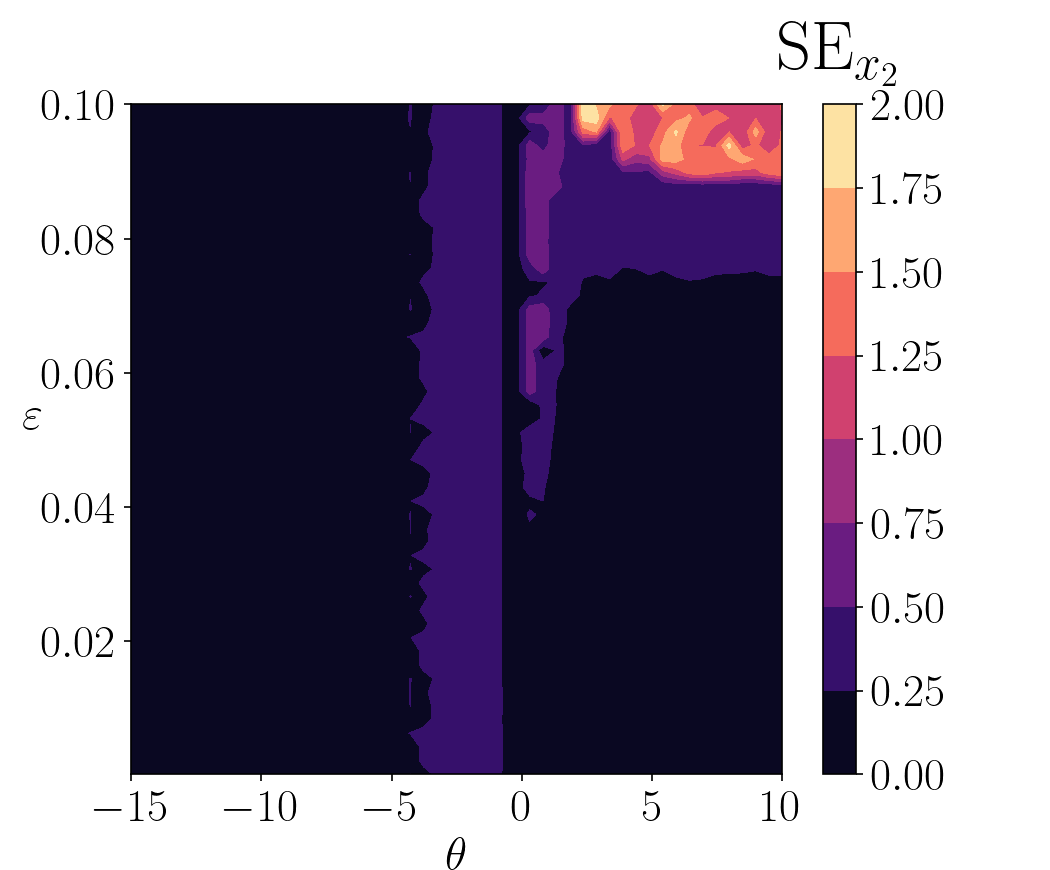

C:\Users\ighosh\AppData\Local\Temp/ipykernel_46340/4179952157.py:17: UserWarning: The following kwargs were not used by contour: 'aspect'
  c = plt.contourf(sampEn2, cmap = 'magma', aspect='auto',


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [12]:
%matplotlib notebook
sz=22
plt.figure(figsize=(7, 5.8))

maxLyap = pd.read_csv('maxLyapB.csv', header=None)
LyapDim = pd.read_csv('LyapDimB.csv', header=None)
Count = pd.read_csv('CountB.csv', header=None)
Count=Count.astype(int)
kTest1 = pd.read_csv('kTest1B.csv', header=None)
kTest2 = pd.read_csv('kTest2B.csv', header=None)
sampEn1 = pd.read_csv('sampEn1B.csv', header=None)
sampEn2 = pd.read_csv('sampEn2B.csv', header=None)
crossCor = pd.read_csv('crossCorB.csv', header=None)
Phi = pd.read_csv('PhiB.csv', header=None)

norm1 = matplotlib.colors.Normalize(vmin=0,vmax=1)
c = plt.contourf(sampEn2, cmap = 'magma', aspect='auto',
                 extent =[min(THETA), max(THETA), min(Epsilon), max(Epsilon)]) 
cbar = plt.colorbar(c) 

# cbar.ax.set_title("$\\max(\\lambda_j)$", size=3/2*sz, pad = 20)
# cbar.ax.set_title("$D$", size=3/2*sz)
# cbar.ax.set_title("$C$", size=3/2*sz)
# cbar.ax.set_title("$K_{x_1}$", size=3/2*sz, pad = 17)
# cbar.ax.set_title("$K_{x_2}$", size=3/2*sz, pad = 17)
# cbar.ax.set_title("${\\rm SE}_{x_1}$", size=3/2*sz, pad = 17)
cbar.ax.set_title("${\\rm SE}_{x_2}$", size=3/2*sz, pad = 17)
# cbar.ax.set_title("$\\Gamma$", size=3/2*sz)
# cbar.ax.set_title("$\\phi$", size=3/2*sz)

for t in cbar.ax.get_yticklabels():
    t.set_fontsize(sz)
plt.xlabel("$\\theta$", size=sz)
plt.ylabel("$\\varepsilon$", size=sz, rotation=False)
plt.xticks(fontsize=sz)
plt.yticks(fontsize=sz)
